Download MySQL: https://dev.mysql.com/downloads/installer/

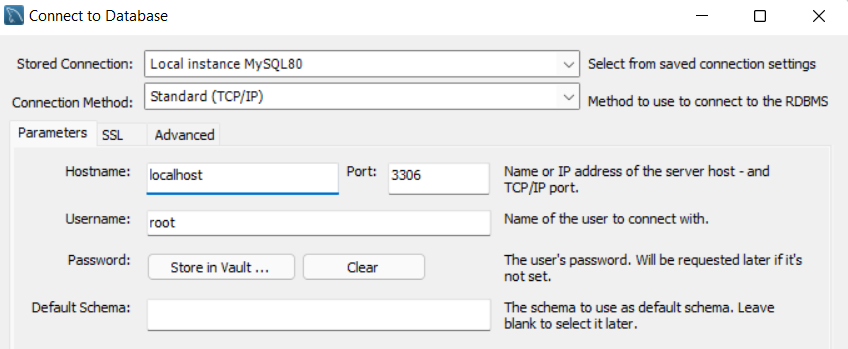

>`Note:` While working in python for MySQL, the MySQL Workbench should be running.

### IMP:
>Hierarchy in MySQL:
>1. Create DataBase
>2. Create Table(s) in the databases --- Tables hold the actual data
>3. Add data/record(s) into the table(s).

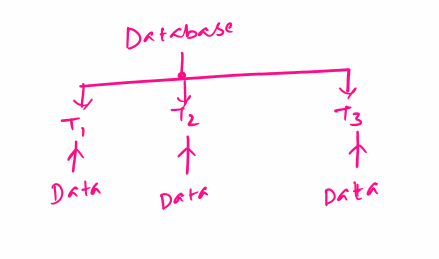

### Connecting Python with MySQL:

`Python MySql Connector:` https://pypi.org/project/mysql-connector-python/

In [1]:
!pip install mysql-connector-python

In [3]:
import mysql.connector as connection

>`Note:` use_pure argument forces mysqlConnector to user pure python connection instead of C extensions which leads to SSL error.

https://pynative.com/python-mysql-database-connection/

Python connector module has a C Extension interface to connect the MySQL database. 

The use_pure connection argument determines whether to connect to MySQL using a pure Python interface or a C Extension.

The default value of use_pure is False means it uses the pure Python implementation to connect. 

>`use_pure` is True means it uses C extension.

`localhost: 127.0.0.1`

In [9]:
#will get the below details from MYSQL workbench
connection.connect(host='localhost',user='root',passwd='MySQL@123',use_pure=True)

### Checking the available databases:

MySQL WorkBench: 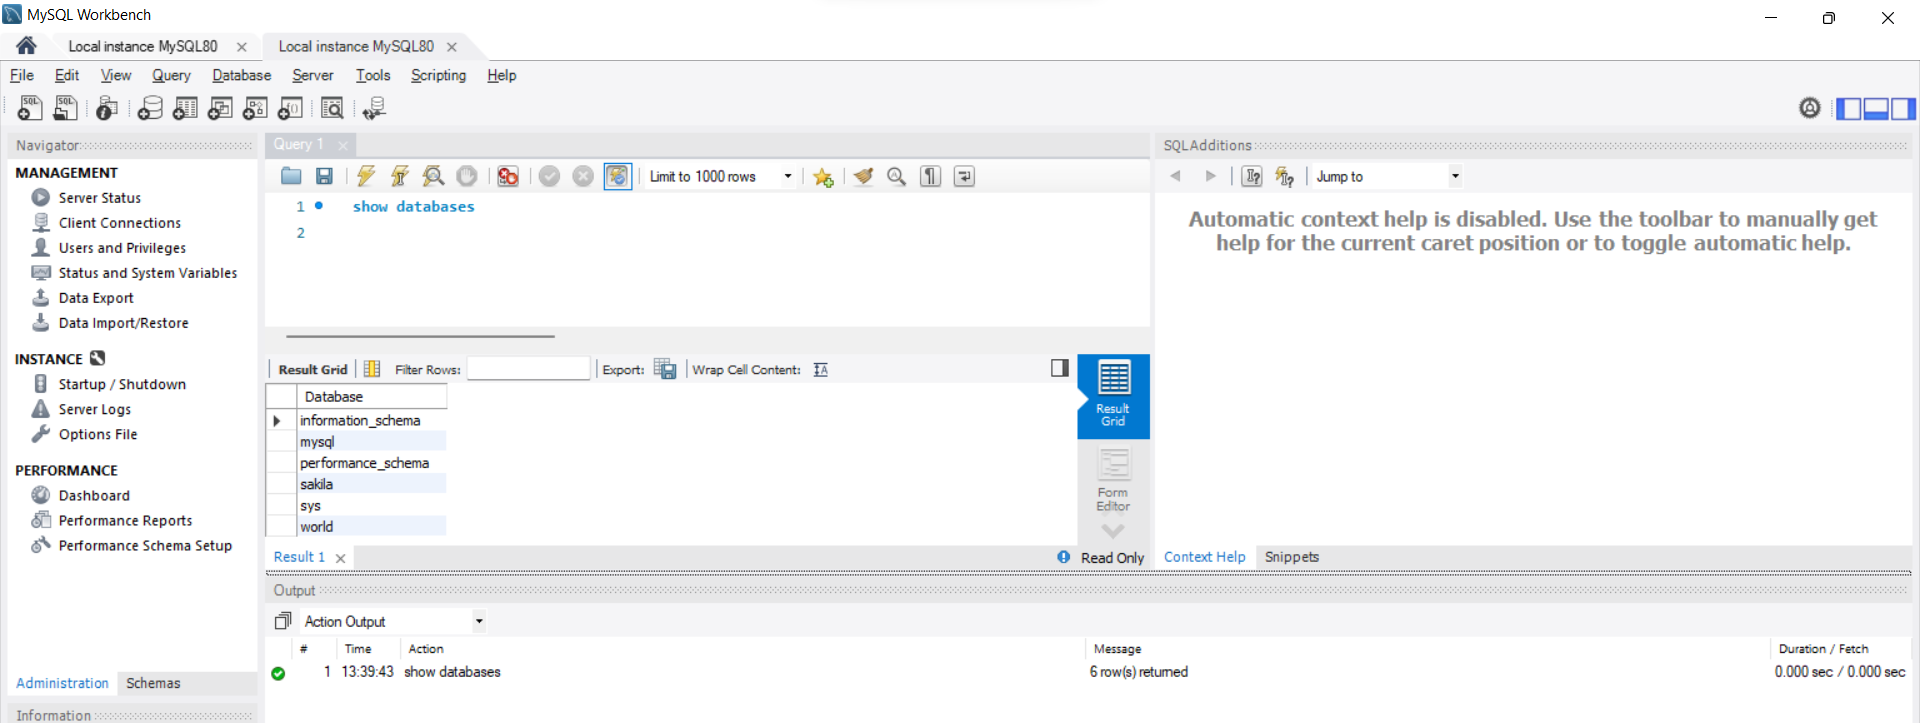

In [9]:
import mysql.connector as connection
mydb=connection.connect(host='localhost',user='root',passwd='MySQL@123',use_pure=True)

In [10]:
cur = mydb.cursor() #create cursor to execute the queries

`whenever we call cursor, it points to the very 1st index`

In [11]:
# type(cur.execute("show databases")) #--- NoneType

In [12]:
cur.execute('show databases')  #After execution the cursor will point to the last location.

In [13]:
res= cur.fetchall()   #fetches the response --- Gives the List of tuples of all databases

In [14]:
res

[('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('sakila',),
 ('sys',),
 ('world',)]

In [15]:
res[1][0]

'mysql'

In [17]:
for i in res:
    print(i[0])

information_schema
mysql
performance_schema
sakila
sys
world


---------------------------------------------------------------------------------------------------------------

In [19]:
import mysql.connector as connection

try:  
    mydb = connection.connect(host='localhost',user='root',passwd='MySQL@123',use_pure=True)
    # check if the connection is established 
    
    query = 'SHOW DATABASES'
    
    cursor=mydb.cursor() #create a cursor to execute the queries
    cursor.execute(query)
    print(cursor.fetchall())
    
except Exception as e:
    mydb.close() #closing the Database
    print(str(e))

[('information_schema',), ('mysql',), ('performance_schema',), ('sakila',), ('sys',), ('world',)]


***

### Creating a DataBase:

MySQL WorkBench:

Creating the Database:
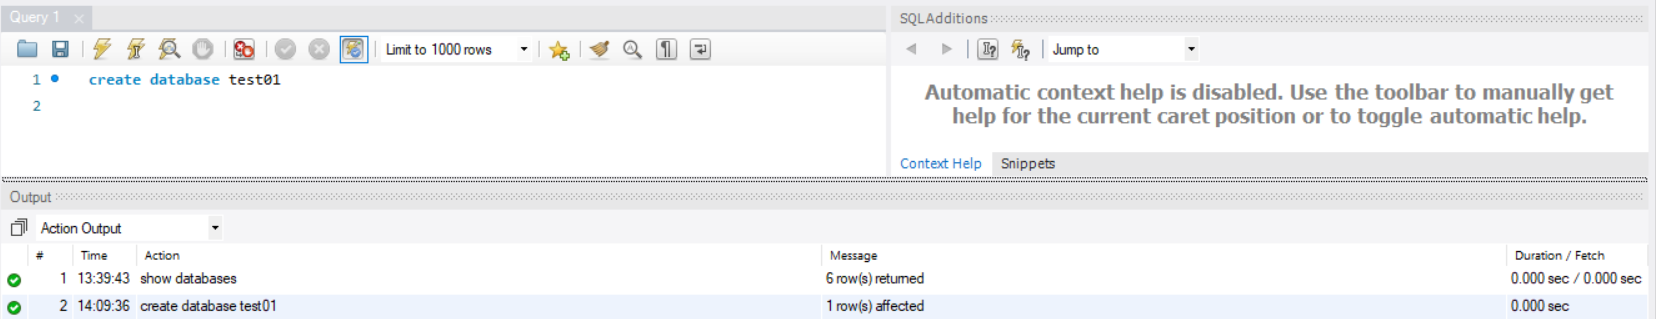

Checking the Databases:
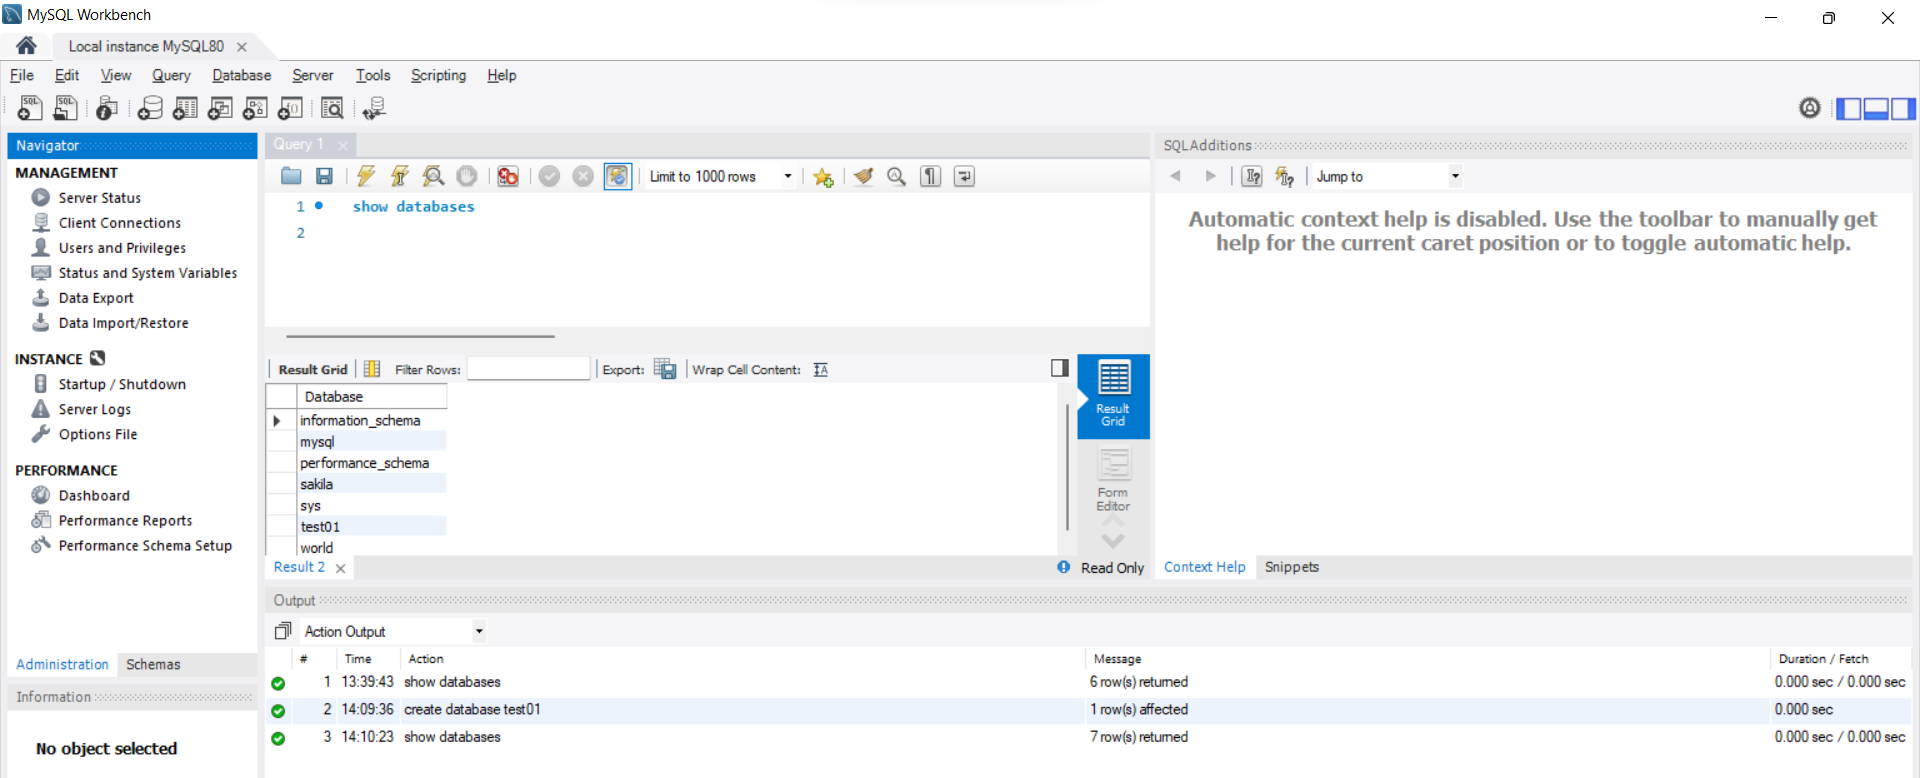

In [10]:
import mysql.connector as connection
mydb = connection.connect(host='localhost',user='root',passwd='MySQL@123',use_pure=True)

In [11]:
cursor=mydb.cursor()

>`syntax:`create database database_name

In [12]:
cursor.execute('create database test1503')

In [13]:
cursor.execute('show databases')

In [14]:
res=cursor.fetchall()

In [15]:
res

[('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('sakila',),
 ('sys',),
 ('test01',),
 ('test1103',),
 ('test1203',),
 ('test1303',),
 ('test1403',),
 ('test1503',),
 ('world',)]

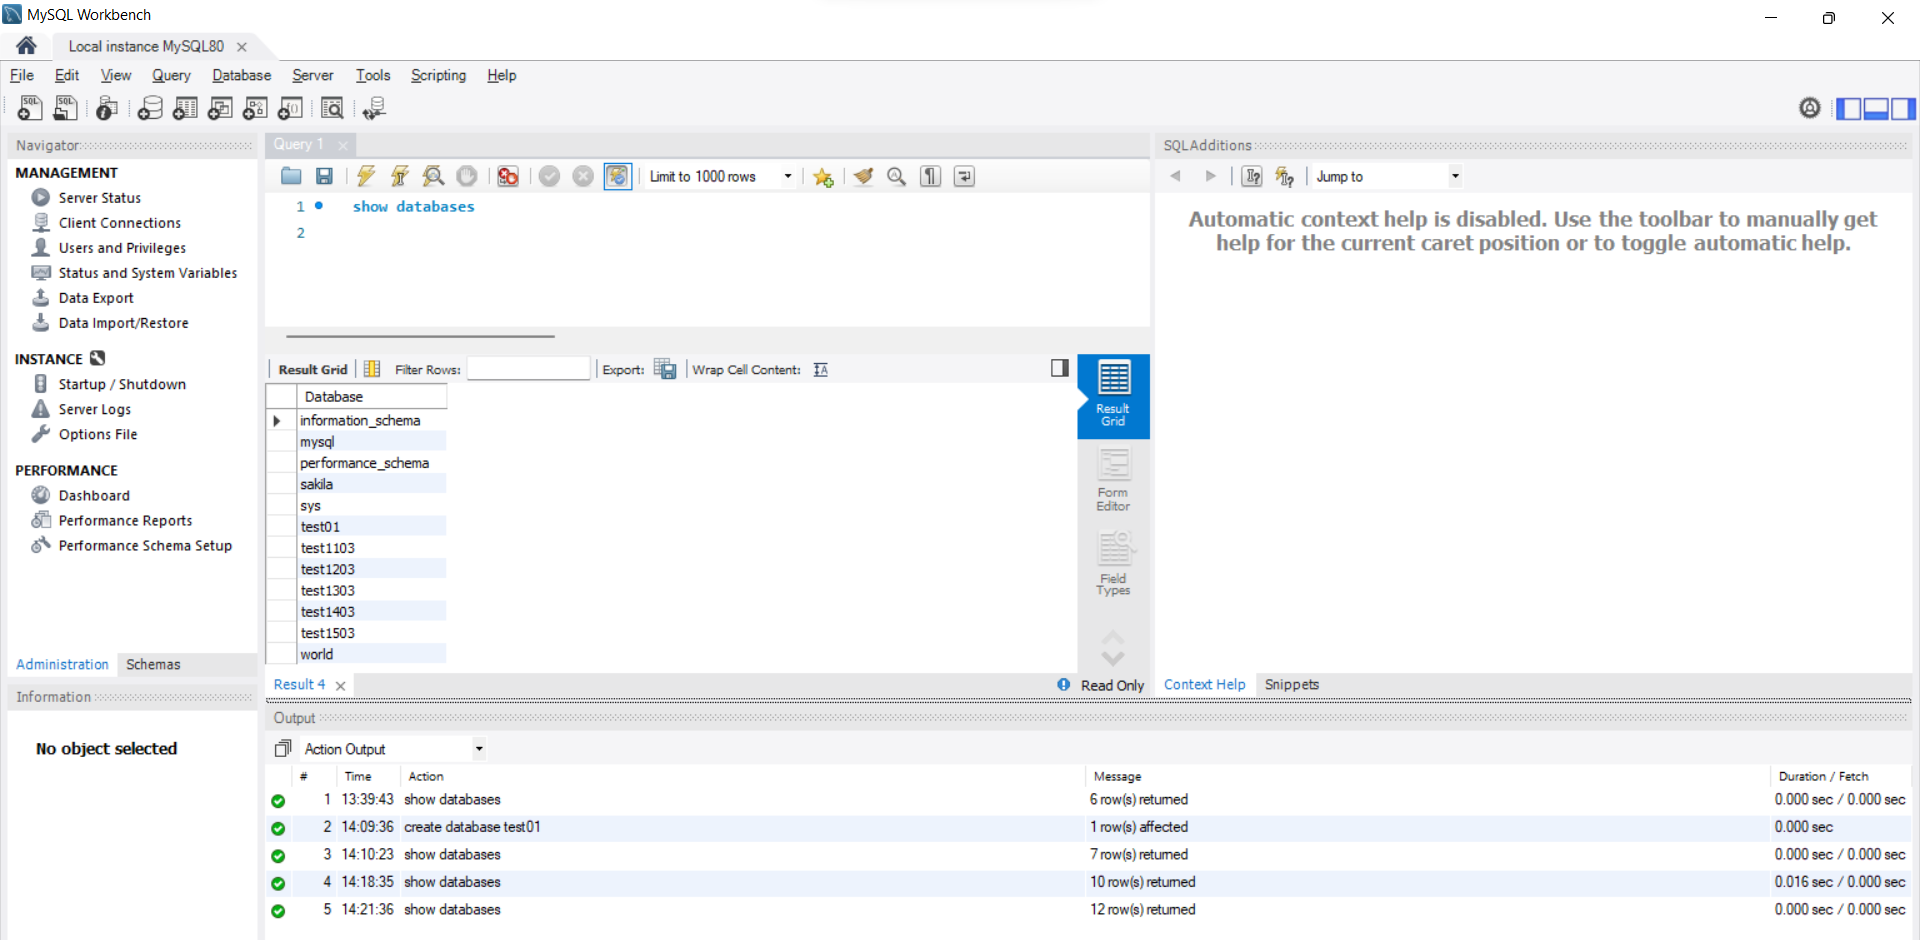

***

>To check whether the DB is connected or not: `mydb.is_connected()`

If connected sucessfully, it returns True.

In [21]:
import mysql.connector as connection
mydb = connection.connect(host='localhost',user='root',passwd='MySQL@123',use_pure=True)
print('Status of DB Connection: ',mydb.is_connected())

Status of DB Connection:  True


In [22]:
import mysql.connector as connection

try:  
    mydb = connection.connect(host='localhost',user='root',passwd='MySQL@123',use_pure=True)
    # check if the connection is established 
    print('Status of DB Connection: ',mydb.is_connected())
    
    query = 'Create database Student'
    
    cursor=mydb.cursor() #create a cursor to execute the queries
    cursor.execute(query)
    print("Database Created!!")
    mydb.close()
    
except Exception as e:
    mydb.close() #closing the Database
    print(str(e))

Status of DB Connection:  True
Database Created!!


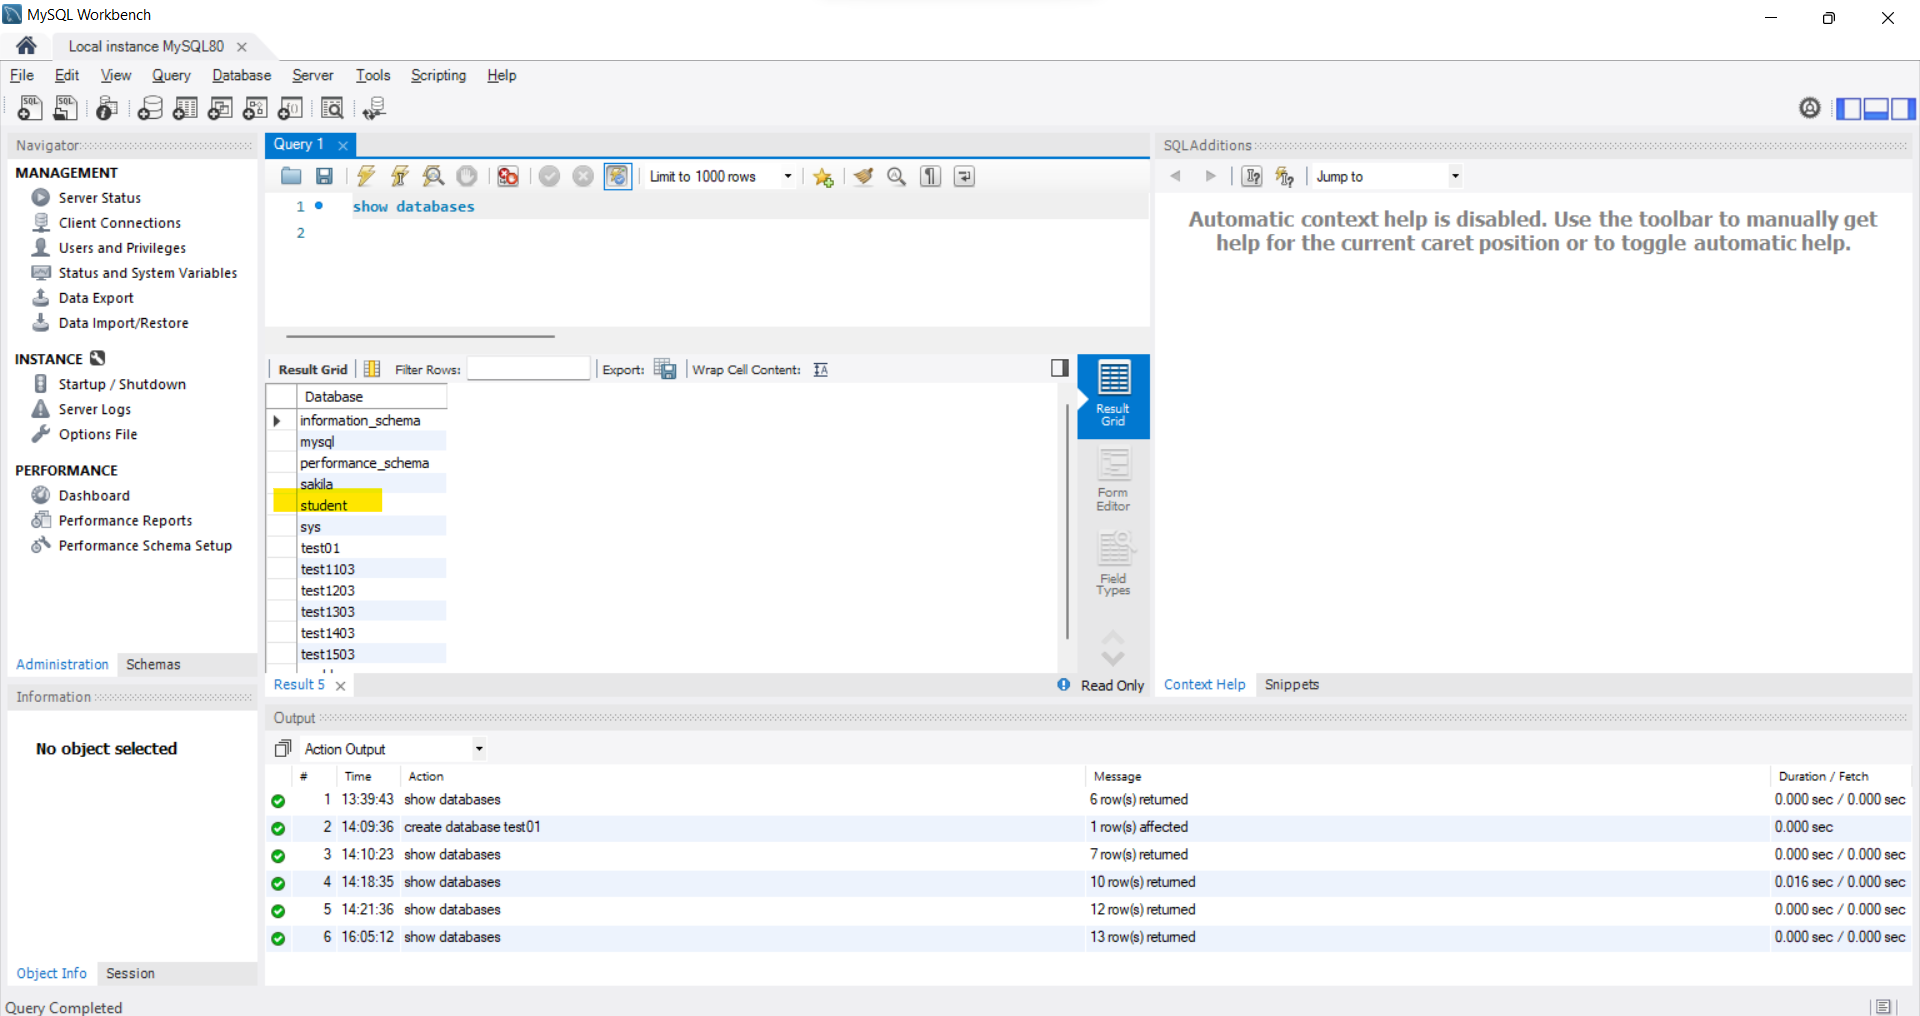

***

### Creating a Table In DataBase:

we need to give the database name in which we need to create a table 

In [2]:
import mysql.connector as connection
mydb = connection.connect(host="localhost", database = 'Student',user="root", passwd="MySQL@123",use_pure=True)
#we need to give the database name in which we need to create a table 

In [24]:
mydb.is_connected()

True

>Syntax to create table: `Create table table_name(col_name datatype_of_col_values (length_of_values_accepted))`

*we can keep length_of_values_accepted empty also

`String equals Varchar`

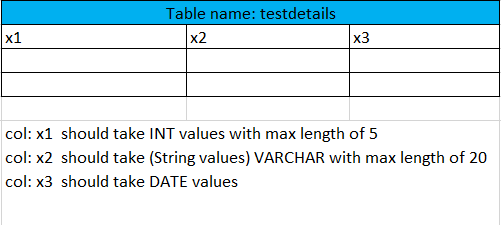

In [3]:
cursor = mydb.cursor() #create a cursor to execute queries
cursor.execute('Create table testdetails(x1 INT(5), x2 VARCHAR(20), x3 DATE)')
mydb.close()

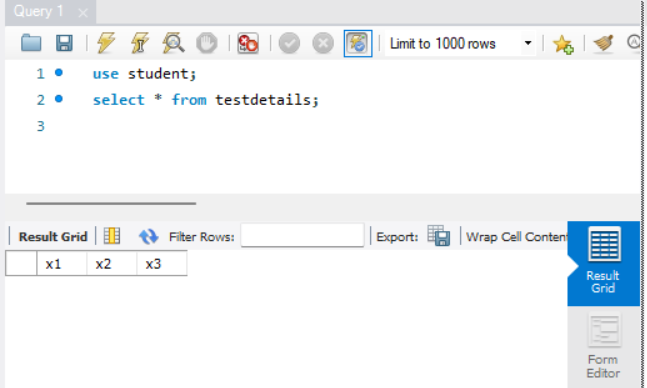

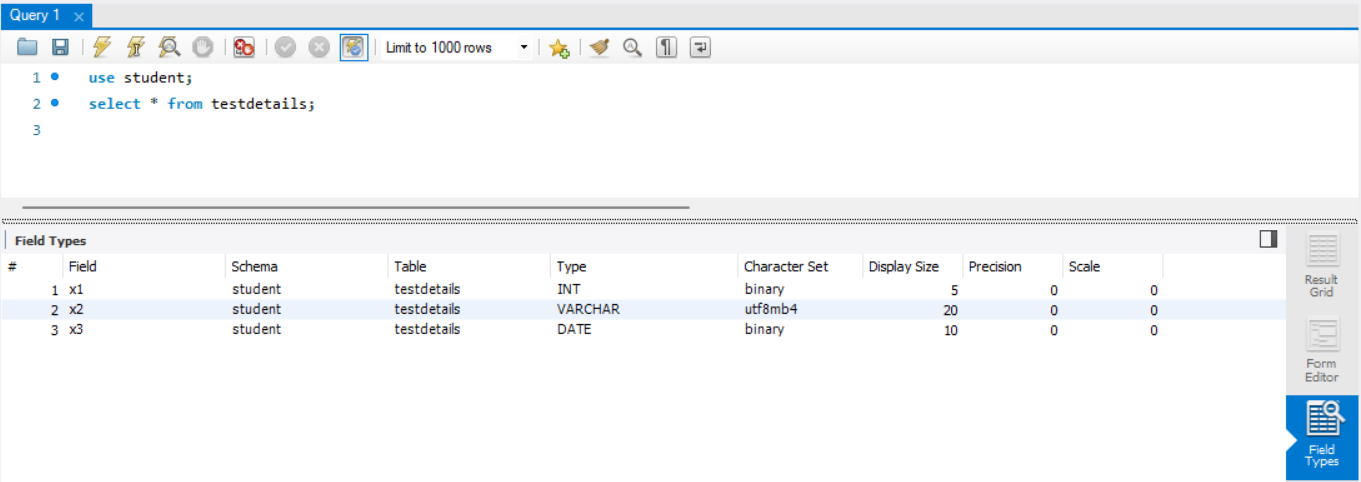

### Inserting Data into Table:

In [6]:
import mysql.connector as connection
mydb = connection.connect(host="localhost", database = 'Student',user="root", passwd="MySQL@123",use_pure=True)
mydb.is_connected()

True

In [5]:
cursor=mydb.cursor()

>Syntax to Insert data into table: 
`insert into table_name values (  )`

 We need to insert the values in the order same as that of cols

#### Inserting data one-by-one:

In [15]:
# table details: x1 INT(5), x2 VARCHAR(20), x3 DATE --- We need to follow the order of col while inserting values

# Dateformat: yyyy-mm-dd
import mysql.connector as connection
mydb = connection.connect(host="localhost", database = 'Student',user="root", passwd="MySQL@123",use_pure=True)
cursor=mydb.cursor()
cursor.execute("insert into student.testdetails values (123, 'krish', '2022-03-11')")

`writing vales in string formats`: "insert into testdetails values (123, 'krish', '2022-03-11')"

We had inserted data but we that will not be present in the table. For the data to be populated in the table we need to use commit()
    
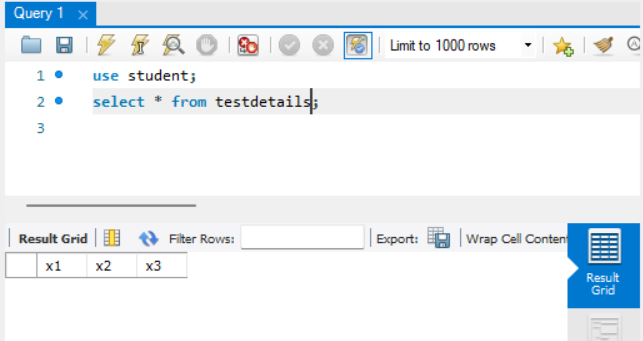

In [10]:
mydb.commit() #informs the interpreter that now finaly I want to check-in my data in the table

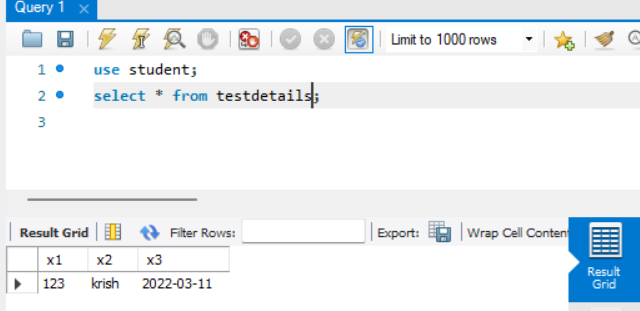

#### Inserting - multiple data:

In [11]:
cursor.execute("insert into testdetails values (456, 'krish12', '2022-03-11')")
cursor.execute("insert into testdetails values (457, 'krish13', '2022-08-11')")
cursor.execute("insert into testdetails values (458, 'krish14', '2022-03-13')")
mydb.commit()

##### We can mention the database name and give only tablename wherever required or esle if we don't give database name, we need to give databasename.tablename when we need to use table

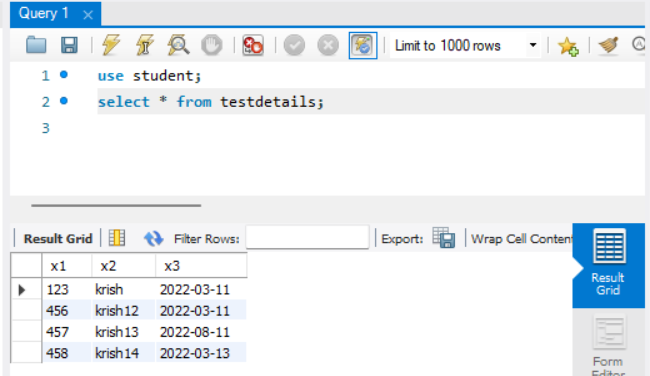

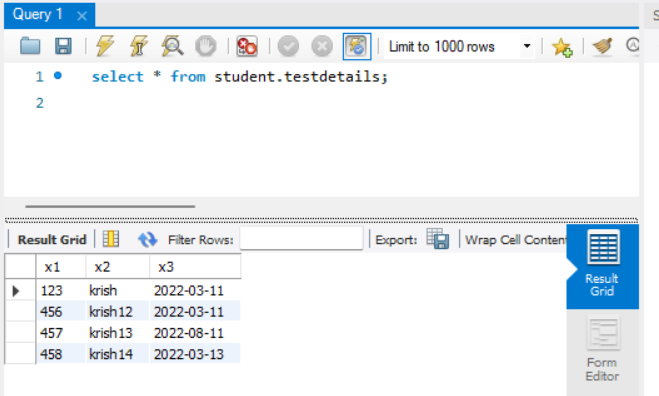

#### Inserting multiple/bulk data in 1 statement:

In [16]:
cursor.execute("insert into testdetails values (456, 'krish12', '2022-03-11'),(459, 'krish13', '2022-08-11'),(460, 'krish14', '2022-03-13')")

mydb.commit()

In [17]:
mydb.close()

--------------------------------------------------------

### Fetching data from Table_Database:

In [66]:
import mysql.connector as connection
mydb=connection.connect(host='localhost', database='Student',user='root',passwd='MySQL@123', use_pure=True)
mydb.is_connected()

True

In [67]:
cursor=mydb.cursor()
cursor.execute('select * from testdetails')

In [68]:
type(out)

NoneType

In [69]:
cursor.fetchall()

[(123, 'krish', datetime.date(2022, 3, 11)),
 (456, 'krish12', datetime.date(2022, 3, 11)),
 (457, 'krish13', datetime.date(2022, 8, 11)),
 (458, 'krish14', datetime.date(2022, 3, 13))]

In [65]:
for i in cursor.fetchall():
    print(i)

(123, 'krish', datetime.date(2022, 3, 11))
(456, 'krish12', datetime.date(2022, 3, 11))
(457, 'krish13', datetime.date(2022, 8, 11))
(458, 'krish14', datetime.date(2022, 3, 13))


##### Getting required columns only:

In [70]:
cur=mydb.cursor()
cur.execute('select x1,x2 from testdetails') #to get only required columns only

In [71]:
for i in cur.fetchall():
    print(i)

(123, 'krish')
(456, 'krish12')
(457, 'krish13')
(458, 'krish14')


In [ ]:
mydb.close()

-------------------------------------------------------------------------------------

### Creating a Dataframe of the table's data:

In [1]:
import mysql.connector as connection
import pandas as pd

In [2]:
mydb = connection.connect(host="localhost", database='Student', user="root", passwd="MySQL@123", use_pure=True)
print(mydb.is_connected())

True


>Syntax for pandas to read sql: `pd.read_sql(sql_query,connection)`

`creates a dataframe of the sql query's result`

In [6]:
pd.read_sql('select * from sqldb789.sqltable785',mydb)

ID     Name              eMailID
0  123    krish    krish@yopmail.com
1  456  krish12  krish12@yopmail.com
2  457  krish13  krish13@yopmail.com
3  458  krish14  krish14@yopmail.com

In [6]:
pd.read_sql('select x2,x3 from testdetails',mydb)

x2          x3
0    krish  2022-03-11
1  krish12  2022-03-11
2  krish13  2022-08-11
3  krish14  2022-03-13

In [8]:
a=pd.read_sql('select x3,x1 from testdetails',mydb)

In [9]:
a

x3   x1
0  2022-03-11  123
1  2022-03-11  456
2  2022-08-11  457
3  2022-03-13  458

`a.to_sql` --- we can write all the data from the dataframe to sql table in single line

----------------------------------------------------------------------------------------

### Writitng data into table from CSV which has data populated from other table:

>`Not Important`

In [8]:
b=pd.read_sql('select * from sqldb789.sqltable785',mydb)

In [9]:
b.to_csv("mydata.csv")

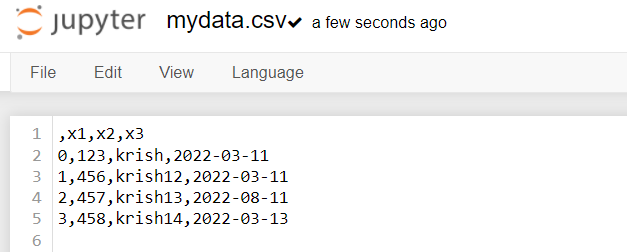

In [14]:
mydb = connection.connect(host="localhost", database='Student', user="root", passwd="MySQL@123", use_pure=True)
mydb.is_connected()

True

In [19]:
cursor=mydb.cursor()
cursor.execute('create table mydata (n1 INT(20), n2 VARCHAR(20), n3 DATE)')

In [20]:
data=pd.read_csv('mydata.csv')

In [21]:
data

Unnamed: 0   x1       x2          x3
0           0  123    krish  2022-03-11
1           1  456  krish12  2022-03-11
2           2  457  krish13  2022-08-11
3           3  458  krish14  2022-03-13

here we get error because the CSV file columns format (no. of columns, type) are different from the table format which we defined while creating.

>We need to use `sqlalchemy` to write to sql

https://stackoverflow.com/questions/59899579/not-all-parameters-were-used-in-the-sql-statement-using-dataframe-to-sql

>Syntax to write into sql: `data.to_sql(table_name,connection)`

In [22]:
data.to_sql('mydata',mydb)

C:\Users\KrishnaAleti\anaconda3\lib\site-packages\pandas\core\generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


DatabaseError: Execution failed on sql 'SELECT name FROM sqlite_master WHERE type='table' AND name=?;': Not all parameters were used in the SQL statement

In [ ]:
from sqlalchemy import create_engine
>>> engine = create_engine('sqlite://', echo=False)

Create a table from scratch with 3 rows.

>>> df = pd.DataFrame({'name' : ['User 1', 'User 2', 'User 3']})
>>> df
     name
0  User 1
1  User 2
2  User 3

>>> df.to_sql('users', con=engine)
>>> engine.execute("SELECT * FROM users").fetchall()
[(0, 'User 1'), (1, 'User 2'), (2, 'User 3')]

An `sqlalchemy.engine.Connection` can also be passed to to `con`:
>>> with engine.begin() as connection:
...     df1 = pd.DataFrame({'name' : ['User 4', 'User 5']})
...     df1.to_sql('users', con=connection, if_exists='append')

This is allowed to support operations that require that the same
DBAPI connection is used for the entire operation.

>>> df2 = pd.DataFrame({'name' : ['User 6', 'User 7']})
>>> df2.to_sql('users', con=engine, if_exists='append')
>>> engine.execute("SELECT * FROM users").fetchall()
[(0, 'User 1'), (1, 'User 2'), (2, 'User 3'),
 (0, 'User 4'), (1, 'User 5'), (0, 'User 6'),
 (1, 'User 7')]

Overwrite the table with just ``df2``.

>>> df2.to_sql('users', con=engine, if_exists='replace',
...            index_label='id')
>>> engine.execute("SELECT * FROM users").fetchall()
[(0, 'User 6'), (1, 'User 7')]

Specify the dtype (especially useful for integers with missing values).
Notice that while pandas is forced to store the data as floating point,
the database supports nullable integers. When fetching the data with
Python, we get back integer scalars.

>>> df = pd.DataFrame({"A": [1, None, 2]})
>>> df
     A
0  1.0
1  NaN
2  2.0

>>> from sqlalchemy.types import Integer
>>> df.to_sql('integers', con=engine, index=False,
...           dtype={"A": Integer()})

### Inserting Bulk data into Table from CSV:

In [1]:
import mysql.connector as connection
import pandas as pandas
import csv

mydb = connection.connect(host="localhost", user="root", passwd="MySQL@123",use_pure=True)

In [2]:
mydb.is_connected()

True

##### Trying to strore the data from the CSV into a new table of existing Database:

In [6]:
cur=mydb.cursor()
cur.execute('create table Student.GlassTable(index_col INT(10),RI float(10,5),Na float(10,5),Mg float(10,5),Al float(10,5),Si float(10,5),K float(10,5),Ca float(10,5),Ba float(10,5),Fe float(10,5),Class_col float(10,5))')

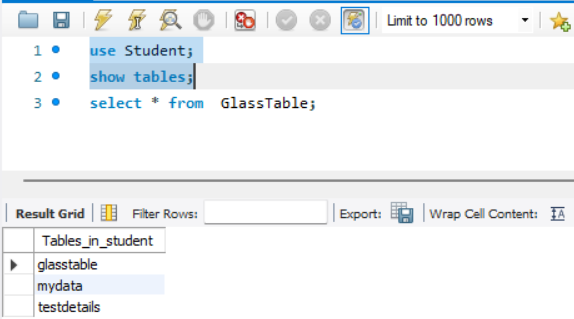
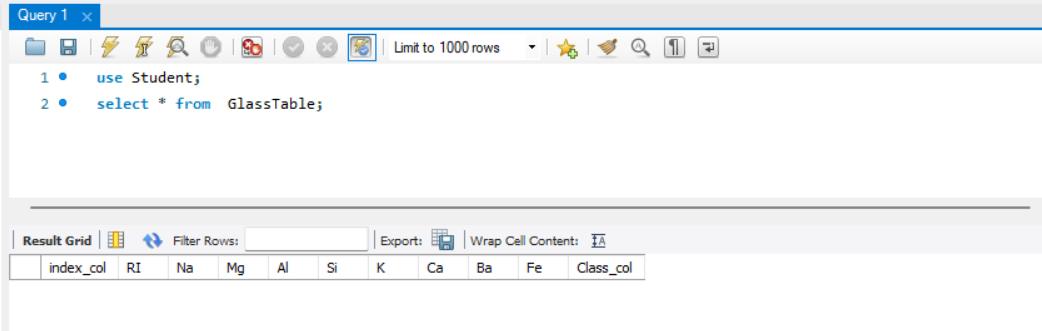
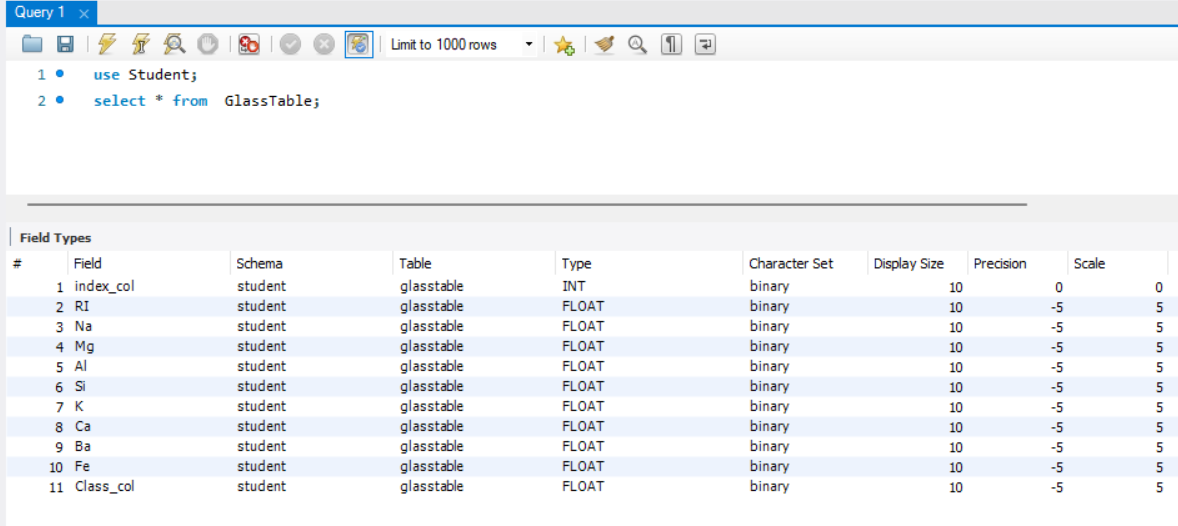

In [9]:
ls

 Volume in drive D is Data
 Volume Serial Number is B49E-AE1F

 Directory of D:\Edu\Data Science_iNeuron\Live Class\DataBases\MySQL

12-03-2022  09:08 AM    <DIR>          .
11-03-2022  11:44 AM    <DIR>          ..
11-03-2022  12:43 PM    <DIR>          .ipynb_checkpoints
21-01-2020  05:39 AM            11,941 glass.data
11-03-2022  12:19 PM         4,600,687 Introduction to MySQL.docx
11-03-2022  06:01 PM               113 mydata.csv
05-08-2020  04:07 PM         2,338,832 MYSQL application.pdf
12-03-2022  09:08 AM         2,551,963 MySQL.ipynb
11-03-2022  11:44 AM                89 MySQL-Imp.txt
               6 File(s)      9,503,625 bytes
               3 Dir(s)  945,260,969,984 bytes free


In [15]:
with open('glass.data','r') as f:
    data=csv.reader(f, delimiter = '\n')#When we get end of line in the file,the cursor will jump to new line to read data
    print(data) # --- <_csv.reader object at 0x000001E608B31C40>
    for i in data:
        print(i)


['index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class']
['1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1']
['2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1']
['3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1']
['4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1']
['5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1']
['6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1']
['7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1']
['8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1']
['9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1']
['10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1']
['11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.00,0.24,1']
['12,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.00,0.00,1']
['13,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24,1']
['14,1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0.00,0.17,1']
['15,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00,1']
['16,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00,1']
['17,1.51784,12.68,3.67

In [17]:
with open('glass.data','r') as f:
    data=csv.reader(f, delimiter = '\n') #When we get end of line in the file,the cursor will jump to new line to read data
    print(data)
    for i in enumerate(data): #enumerate gives index along with the data
        print(i)

(0, ['index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class'])
(1, ['1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1'])
(2, ['2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1'])
(3, ['3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1'])
(4, ['4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1'])
(5, ['5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1'])
(6, ['6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1'])
(7, ['7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1'])
(8, ['8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1'])
(9, ['9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1'])
(10, ['10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1'])
(11, ['11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.00,0.24,1'])
(12, ['12,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.00,0.00,1'])
(13, ['13,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24,1'])
(14, ['14,1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0.00,0.17,1'])
(15, ['15,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00,1

In [2]:
import csv
with open('glass.data','r') as f1:
    next(f1) #we need to write values from the 2nd row (index=1) of the glass data file bcz 1st row is having col names
    data=csv.reader(f1, delimiter = '\n') 
    print(data)
    for i in enumerate(data): 
        for j in i[1]: 
            print(j)
            

1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1
11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.00,0.24,1
12,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.00,0.00,1
13,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24,1
14,1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0.00,0.17,1
15,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00,1
16,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00,1
17,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00,1
18,1.52196,14.36,3.85,0.89,71.36,0.15,9.15,0.00,0.00,1
19,1.51911,13.90,3.

In [23]:
with open('glass.data','r') as f:
    next(f) #we need to write values from the 2nd row (index=1) of the glass data file bcz 1st row is having col names
    data=csv.reader(f, delimiter = '\n')#When we get end of line in the file,the cursor will jump to new line to read data
    print(data)
    for i in enumerate(data): #enumerate gives index along with the data
        print(i)
        for j in i[1]: #i[1] --- actual values
            cur.execute('insert into Student.GlassTable values ({row})'.format(row=(j)))
    print('Values Inserted!')
    mydb.commit()   

(0, ['1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1'])
(1, ['2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1'])
(2, ['3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1'])
(3, ['4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1'])
(4, ['5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1'])
(5, ['6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1'])
(6, ['7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1'])
(7, ['8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1'])
(8, ['9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1'])
(9, ['10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1'])
(10, ['11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.00,0.24,1'])
(11, ['12,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.00,0.00,1'])
(12, ['13,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24,1'])
(13, ['14,1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0.00,0.17,1'])
(14, ['15,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00,1'])
(15, ['16,1.51761,12.81,3.54,1.23,73.24,0.58

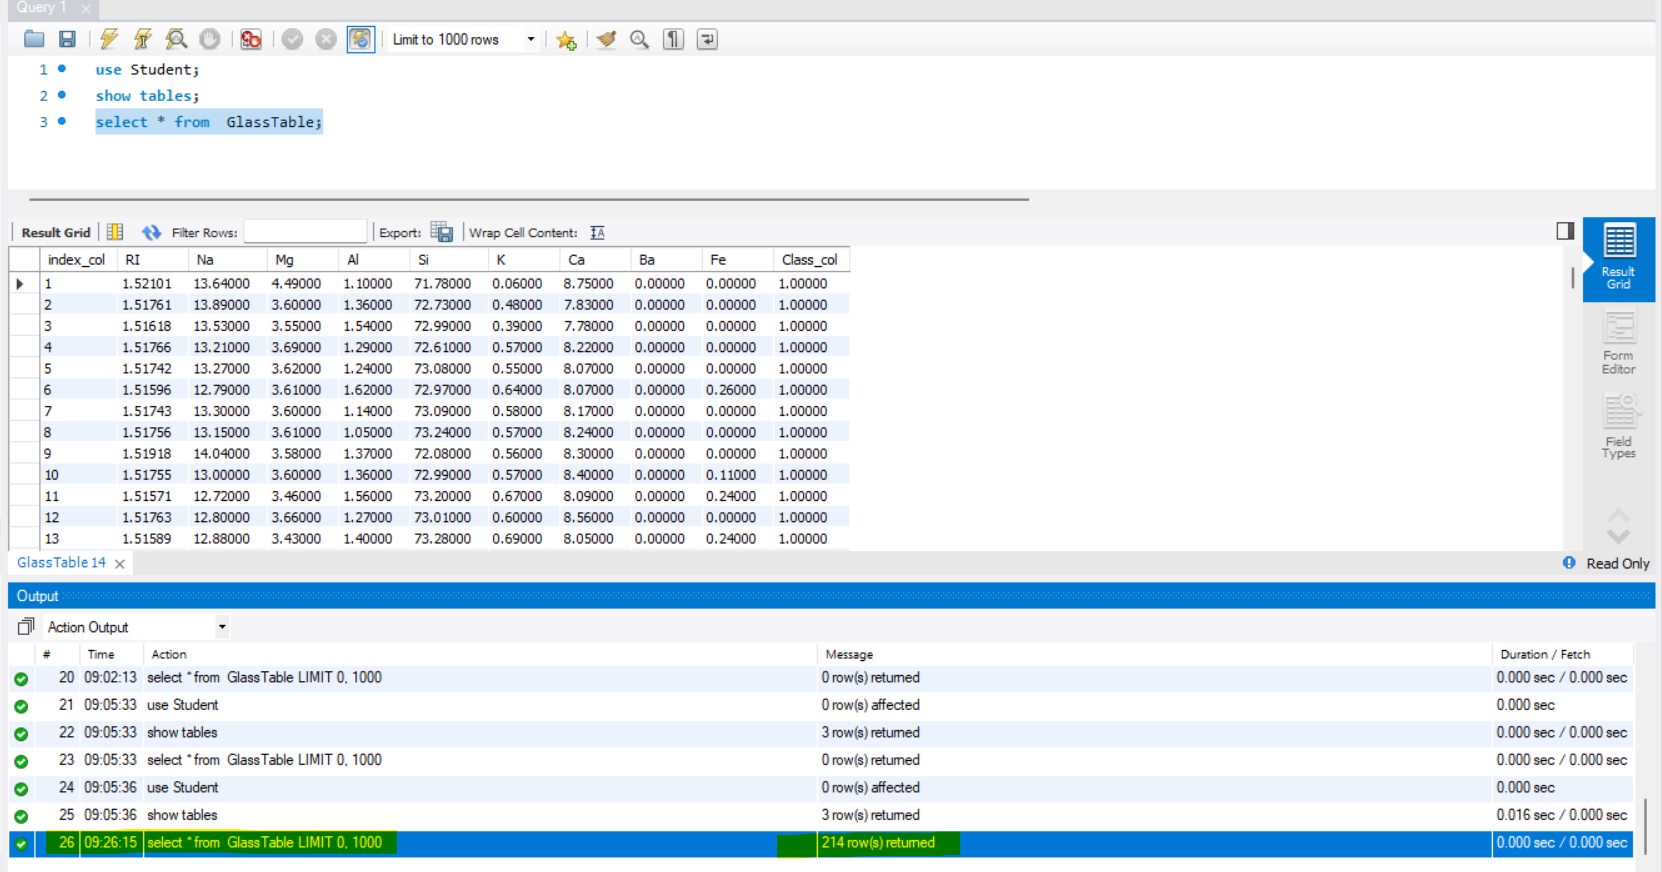

In [5]:
mydb.close()

----------------------------------------------------------------------------------------

##### Without using .format()

In [21]:
import mysql.connector as connection
import pandas as pandas
import csv

mydb = connection.connect(host="localhost", user="root", passwd="MySQL@123",use_pure=True)
cur=mydb.cursor()
cur.execute('create table Student.GlassTable1508(index_col INT(10),RI float(10,5),Na float(10,5),Mg float(10,5),Al float(10,5),Si float(10,5),K float(10,5),Ca float(10,5),Ba float(10,5),Fe float(10,5),Class_col float(10,5))')


In [19]:
import csv
with open('glass.data','r') as f:
    next(f) 
    data=csv.reader(f, delimiter = '\n')
    print(data)
    for i in enumerate(data): 
        print(i) #(0, ['1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1'])
        print(i[1]) # ['1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1']
        for j in i[1]: 
            print(j) #1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
            print(type(j)) #---string


(0, ['1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1'])
['1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1']
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
<class 'str'>
(1, ['2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1'])
['2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1']
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
<class 'str'>
(2, ['3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1'])
['3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1']
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
<class 'str'>
(3, ['4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1'])
['4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1']
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
<class 'str'>
(4, ['5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1'])
['5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1']
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
<class 'str'>
(5, ['6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.

In [18]:
import csv
with open('glass.data','r') as f:
    next(f) 
    data=csv.reader(f, delimiter = '\n')
    print(data)
    for i in enumerate(data): 
        for j in i[1]:
            print(j)
#             cur.execute('insert into Student.GlassTable1507 values ({row})'.format(row=(j)))
            cur.execute('insert into Student.GlassTable1507 values (j)')

    print('Values Inserted!')
    mydb.commit()   

1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1


DataError: 1136 (21S01): Column count doesn't match value count at row 1

>While loading data --- we need to treat j as variable.

`(f'insert into Student.GlassTable1508 values ({j})') `

In [22]:
import csv
with open('glass.data','r') as f:
    next(f) 
    data=csv.reader(f, delimiter = '\n')
    print(data)
    for i in enumerate(data): 
        for j in i[1]:
            print(j)
#             cur.execute('insert into Student.GlassTable1508 values ({row})'.format(row=(j)))
            cur.execute(f'insert into Student.GlassTable1508 values ({j})') #we need to treat j as variable.

    print('Values Inserted!')
    mydb.commit()   

1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1
11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.00,0.24,1
12,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.00,0.00,1
13,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24,1
14,1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0.00,0.17,1
15,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00,1
16,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00,1
17,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00,1
18,1.52196,14.36,3.85,0.89,71.36,0.15,9.15,0.00,0.00,1
19,1.51911,13.90,3.

---------------------------------------------------------------------

##### Without using the enumerate:

In [2]:
import mysql.connector as connection
import pandas as pandas
import csv

mydb = connection.connect(host="localhost", user="root", passwd="MySQL@123",use_pure=True)
cur=mydb.cursor()
cur.execute('create table Student.GlassTable1303(index_col INT(10),RI float(10,5),Na float(10,5),Mg float(10,5),Al float(10,5),Si float(10,5),K float(10,5),Ca float(10,5),Ba float(10,5),Fe float(10,5),Class_col float(10,5))')

In [9]:
with open('glass.data','r') as f:
    next(f) #we need to write values from the 2nd row (index=1) of the glass data file bcz 1st row is having col names
    data=csv.reader(f, delimiter = '\n')#When we get end of line in the file,the cursor will jump to new line to read data
    print(data)
    for j in data:
        print(j)
    print('Values Inserted!')

['1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1']
['2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1']
['3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1']
['4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1']
['5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1']
['6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1']
['7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1']
['8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1']
['9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1']
['10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1']
['11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.00,0.24,1']
['12,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.00,0.00,1']
['13,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24,1']
['14,1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0.00,0.17,1']
['15,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00,1']
['16,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00,1']
['17,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00,1']
['18,1

In [10]:
with open('glass.data','r') as f:
    next(f) #we need to write values from the 2nd row (index=1) of the glass data file bcz 1st row is having col names
    data=csv.reader(f, delimiter = '\n')#When we get end of line in the file,the cursor will jump to new line to read data
    print(data)
    for j in data:
        print(j)
        cur.execute('insert into Student.GlassTable1203 values ({row})'.format(row=(j)))
    print('Values Inserted!')
    mydb.commit() 

['1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1']


ProgrammingError: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '['1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1'])' at line 1

In [16]:
with open('glass.data','r') as f:
    next(f) 
    data=csv.reader(f, delimiter = '\n')
    print(data)
    for j in data:
        print(type(j))
        print(j)
#         cur.execute('insert into Student.GlassTable1203 values ({row})'.format(row=(j)))
    print('Values Inserted!')
    mydb.commit() 

<class 'list'>
['1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1']
<class 'list'>
['2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1']
<class 'list'>
['3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1']
<class 'list'>
['4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1']
<class 'list'>
['5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1']
<class 'list'>
['6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1']
<class 'list'>
['7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1']
<class 'list'>
['8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1']
<class 'list'>
['9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1']
<class 'list'>
['10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1']
<class 'list'>
['11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.00,0.24,1']
<class 'list'>
['12,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.00,0.00,1']
<class 'list'>
['13,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24,1']
<class 'list'>
['14,1.51748,12.86,3.56,1.27,73.

In [12]:
with open('glass.data','r') as f:
    next(f) 
    data=csv.reader(f, delimiter = '\n')
    print(data)
    for i in enumerate(data): 
        print(i)
        for j in i[1]: 
            print(type(j)) #--- String, we need to insert values in String format only
    print('Values Inserted!')
    mydb.commit()   

(0, ['1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1'])
<class 'str'>
(1, ['2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1'])
<class 'str'>
(2, ['3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1'])
<class 'str'>
(3, ['4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1'])
<class 'str'>
(4, ['5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1'])
<class 'str'>
(5, ['6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1'])
<class 'str'>
(6, ['7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1'])
<class 'str'>
(7, ['8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1'])
<class 'str'>
(8, ['9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1'])
<class 'str'>
(9, ['10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1'])
<class 'str'>
(10, ['11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.00,0.24,1'])
<class 'str'>
(11, ['12,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.00,0.00,1'])
<class 'str'>
(12, ['13,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24,1'])
<class

##### IMP:

> `IMP:` In the below code block when we give values as `j`, 
it takes the entire list which is ['1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1'] as a value and it is wrong.

Because we need to give the string as values.
For that we need to give `j[0]` or `str(j[0])`, because the entire string which needs to be given as value is in index 0 of the list.

In [1]:
import csv
with open('glass.data','r') as f:
    next(f) 
    data=csv.reader(f, delimiter = '\n')
    print(data)
    for j in data:
        print(j)
        print(j[0])
        print(type((j[0]))) #---String

['1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1']
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
<class 'str'>
['2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1']
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
<class 'str'>
['3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1']
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
<class 'str'>
['4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1']
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
<class 'str'>
['5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1']
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
<class 'str'>
['6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1']
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
<class 'str'>
['7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1']
7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
<class 'str'>
['8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1']
8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
<class

In [19]:
with open('glass.data','r') as f:
    next(f) 
    data=csv.reader(f, delimiter = '\n')
    print(data)
    for j in data:
        print(j)
        print(type(str(j)))
        cur.execute('insert into Student.GlassTable1203 values ({row})'.format(row=(str(j)))) 
    #typecasted the list into string values
    print('Values Inserted!')
    mydb.commit() 

['1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1']
<class 'str'>


ProgrammingError: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '['1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1'])' at line 1

In [4]:
with open('glass.data','r') as f:
    next(f) 
    data=csv.reader(f, delimiter = '\n')
    print(data)
    for j in data:
#         print(j)
#         print(type(str(j)))
        cur.execute('insert into Student.GlassTable1303 values ({row})'.format(row=(str(j[0]))))
    #typecasted the list into string values
    print('Values Inserted!')
    mydb.commit() 

Values Inserted!


In [3]:
with open('glass.data','r') as f:
    next(f) 
    data=csv.reader(f, delimiter = '\n')
    print(data)
    for j in data:
#         print(j)
#         print(type(str(j)))
        cur.execute('insert into Student.GlassTable1303 values ({row})'.format(row=(j[0])))
    #typecasted the list into string values
    print('Values Inserted!')
    mydb.commit() 

Values Inserted!


--------------------------------------------------------------------

### Delete data from the Table:

In [2]:
import mysql.connector as connection
mydb=connection.connect(host='localhost',database='Student', user='root',passwd='MySQL@123',use_pure=True)
mydb.is_connected()

True

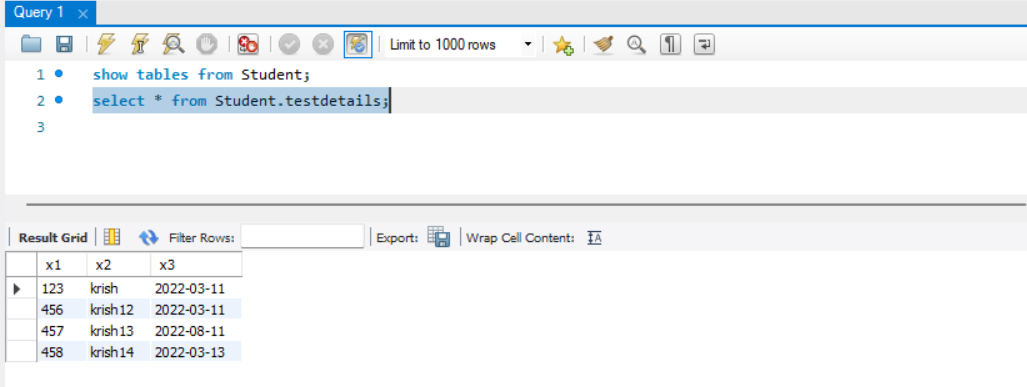

>`Syntax:` delete from table_name condition

>delete from table_name where col_name='value'

In [5]:
cursor=mydb.cursor()
cursor.execute('delete from Student.testdetails where x1=458')
mydb.commit()

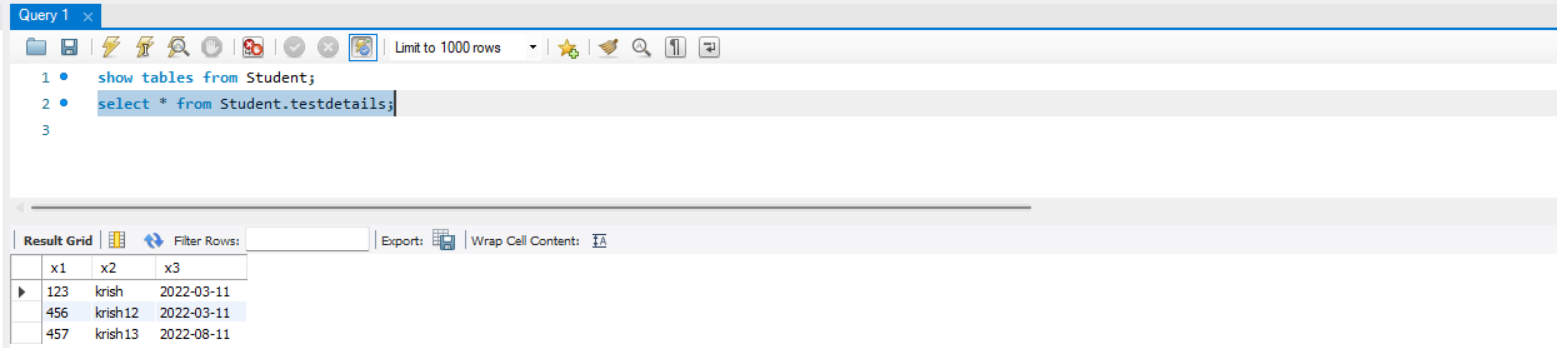

--------------------------------------------------------------------------

### Update table:

In [9]:
import mysql.connector as connection
mydb=connection.connect(host='localhost',database='Student', user='root',passwd='MySQL@123',use_pure=True)
mydb.is_connected()

True

In [12]:
cursor=mydb.cursor()
cursor.execute("UPDATE Student.testdetails SET x1=1403, x2='krish' WHERE x1=456")

mydb.commit()

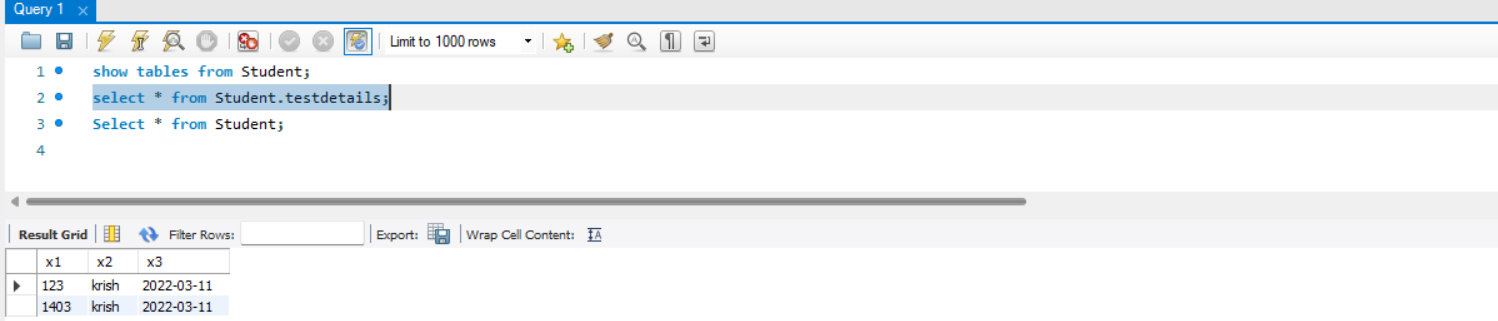

In [13]:
mydb.close()

-------------------------------------------------------------------------------

List of Databases: `SHOW databases`
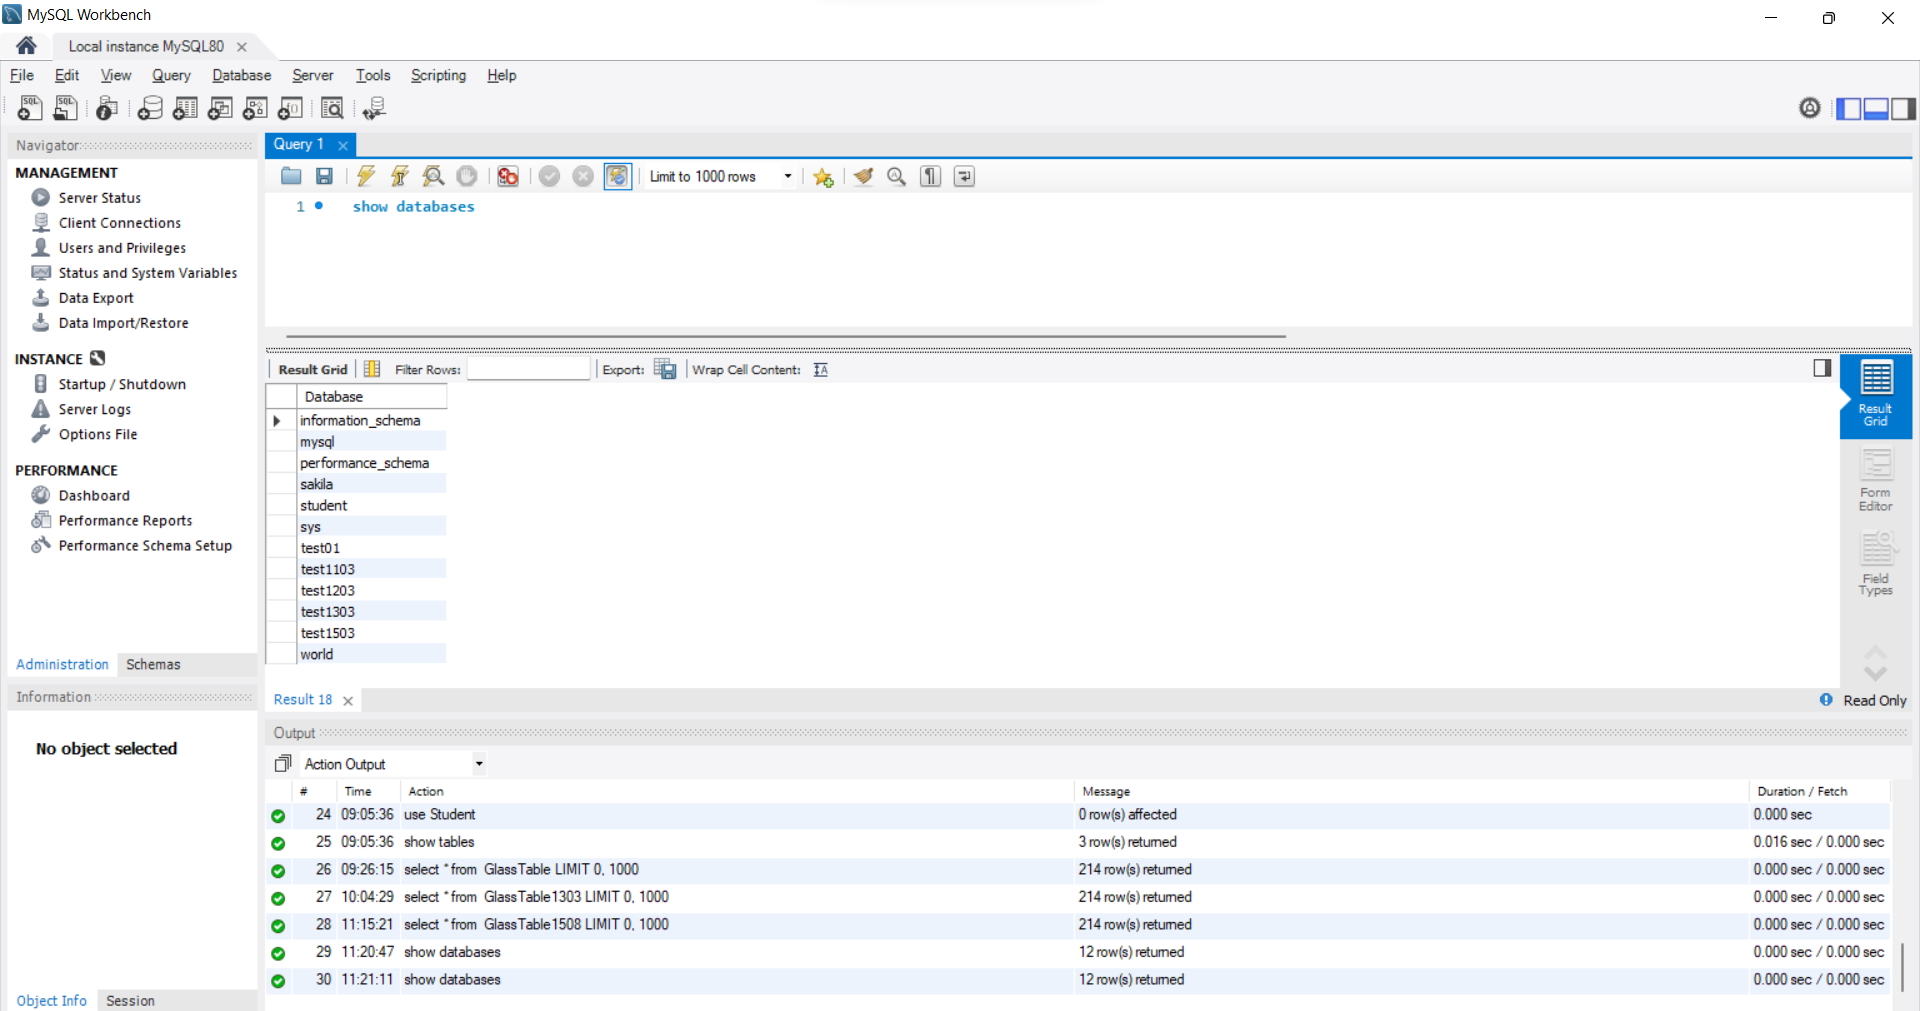

List of all tables in a Database: `SHOW TABLES FROM database_name`
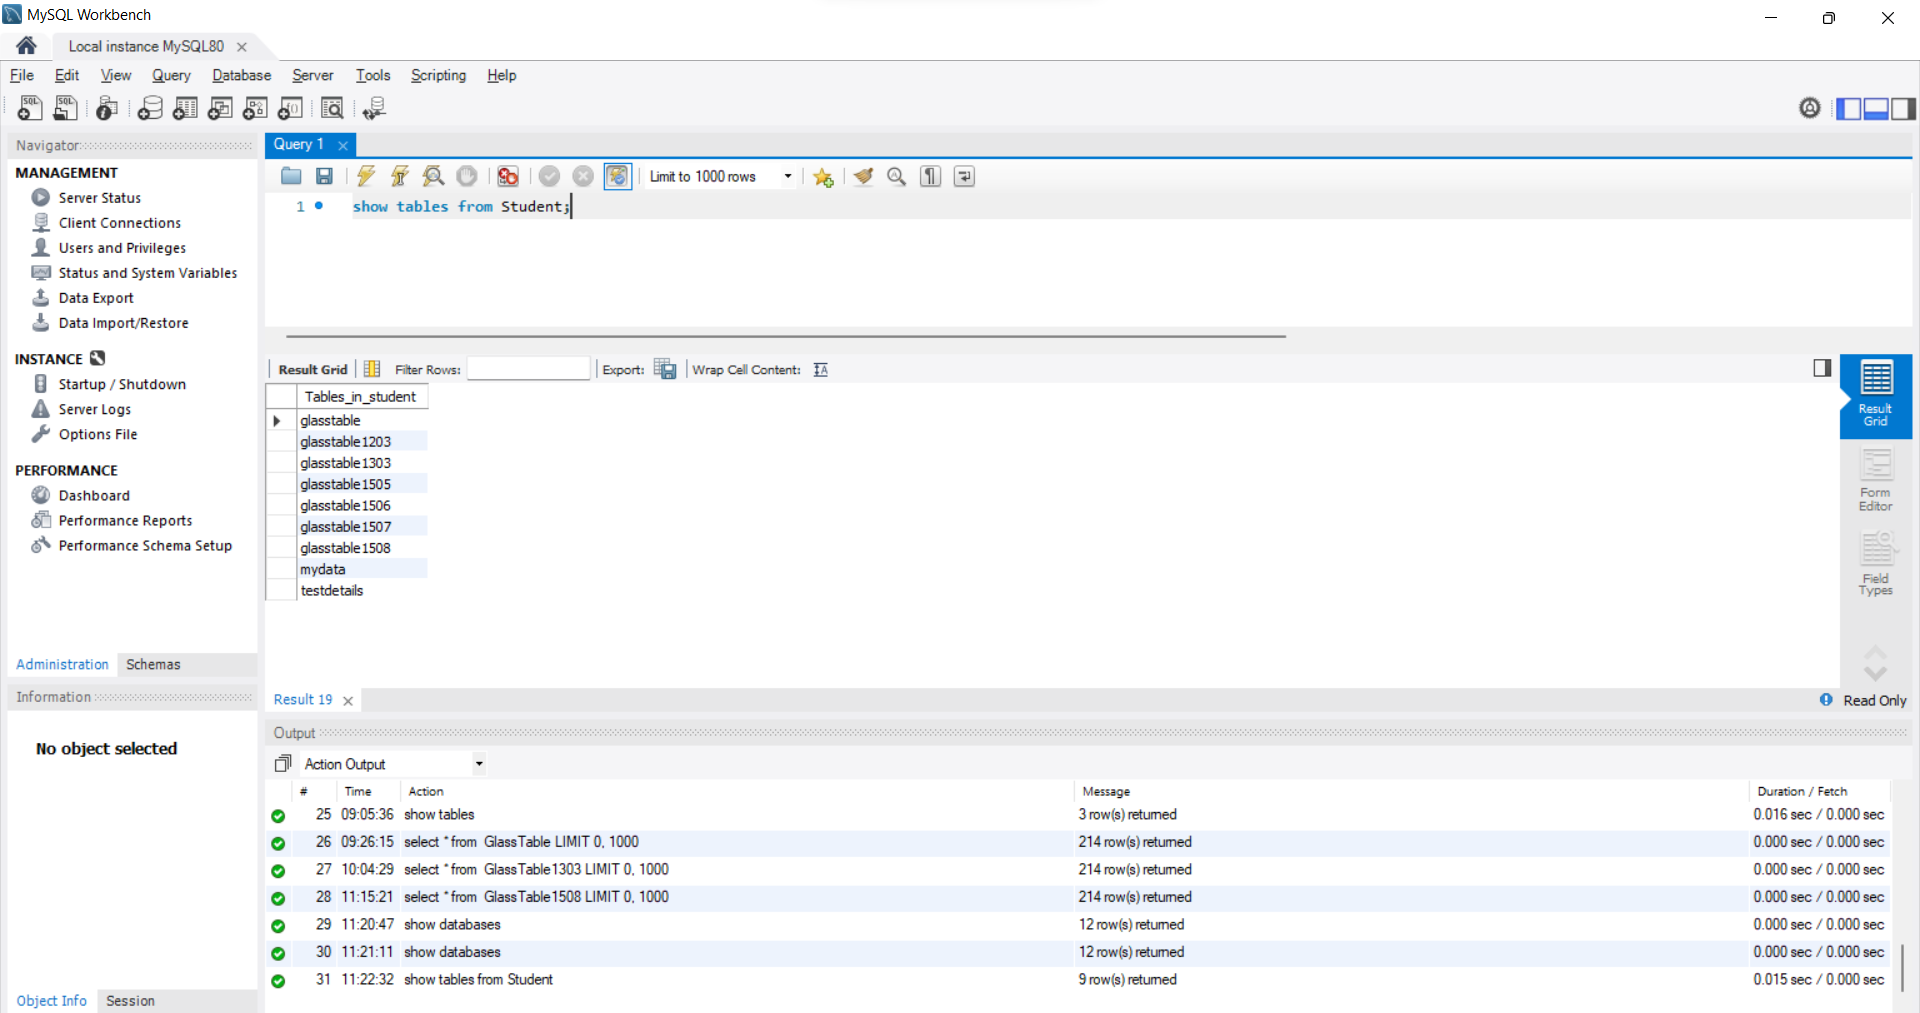

Delete a Database: `DROP DATABASE database_name`
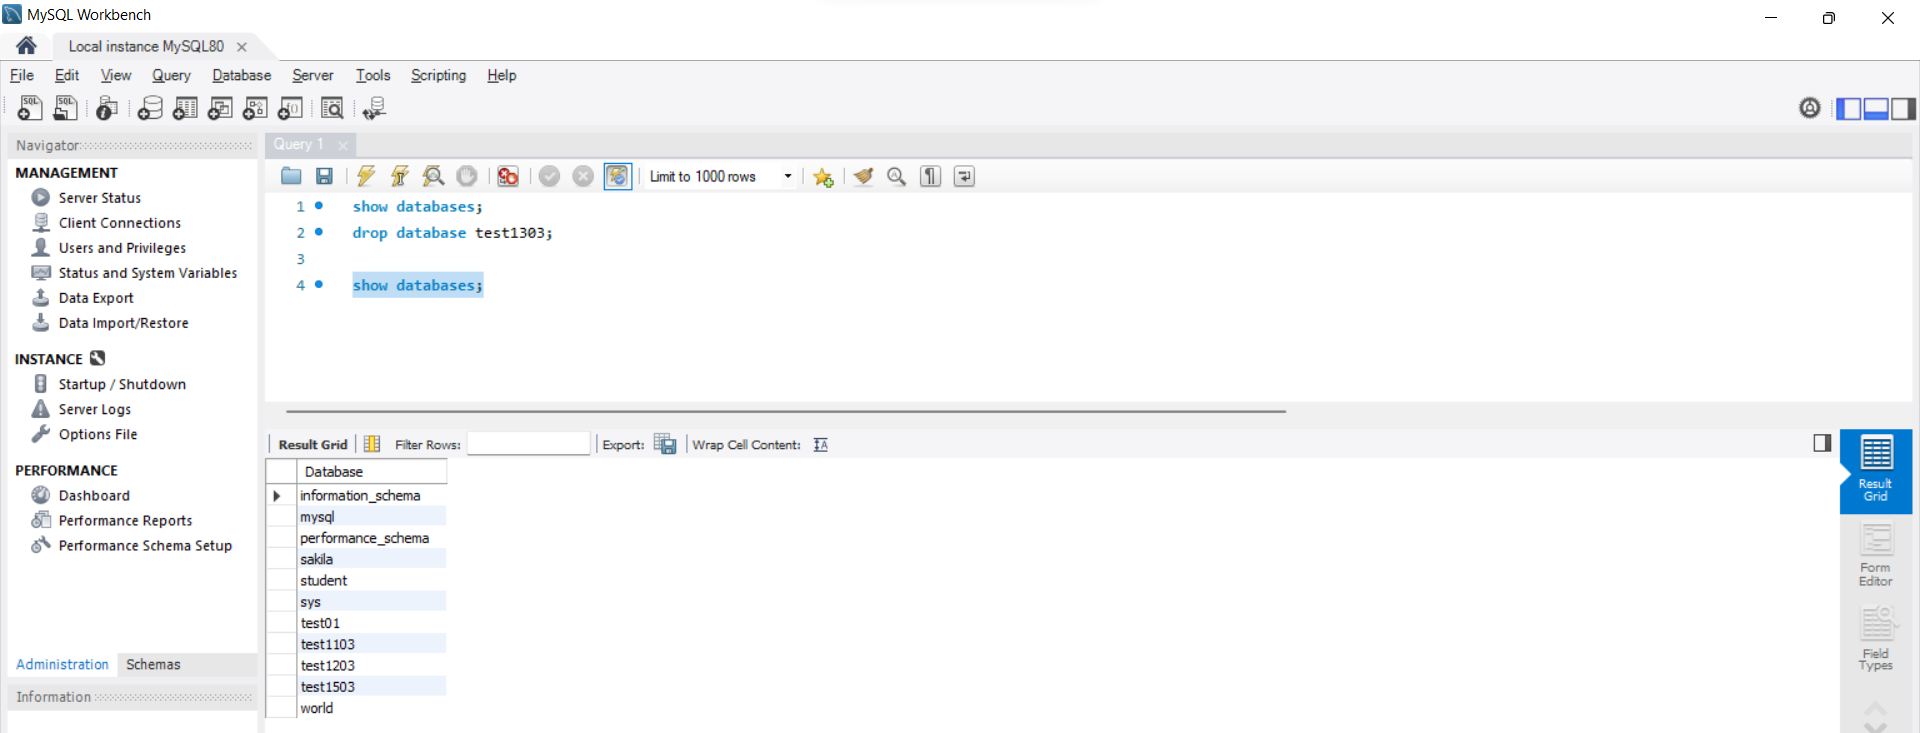

Delete a table from Database: `DROP TABLE table_name`
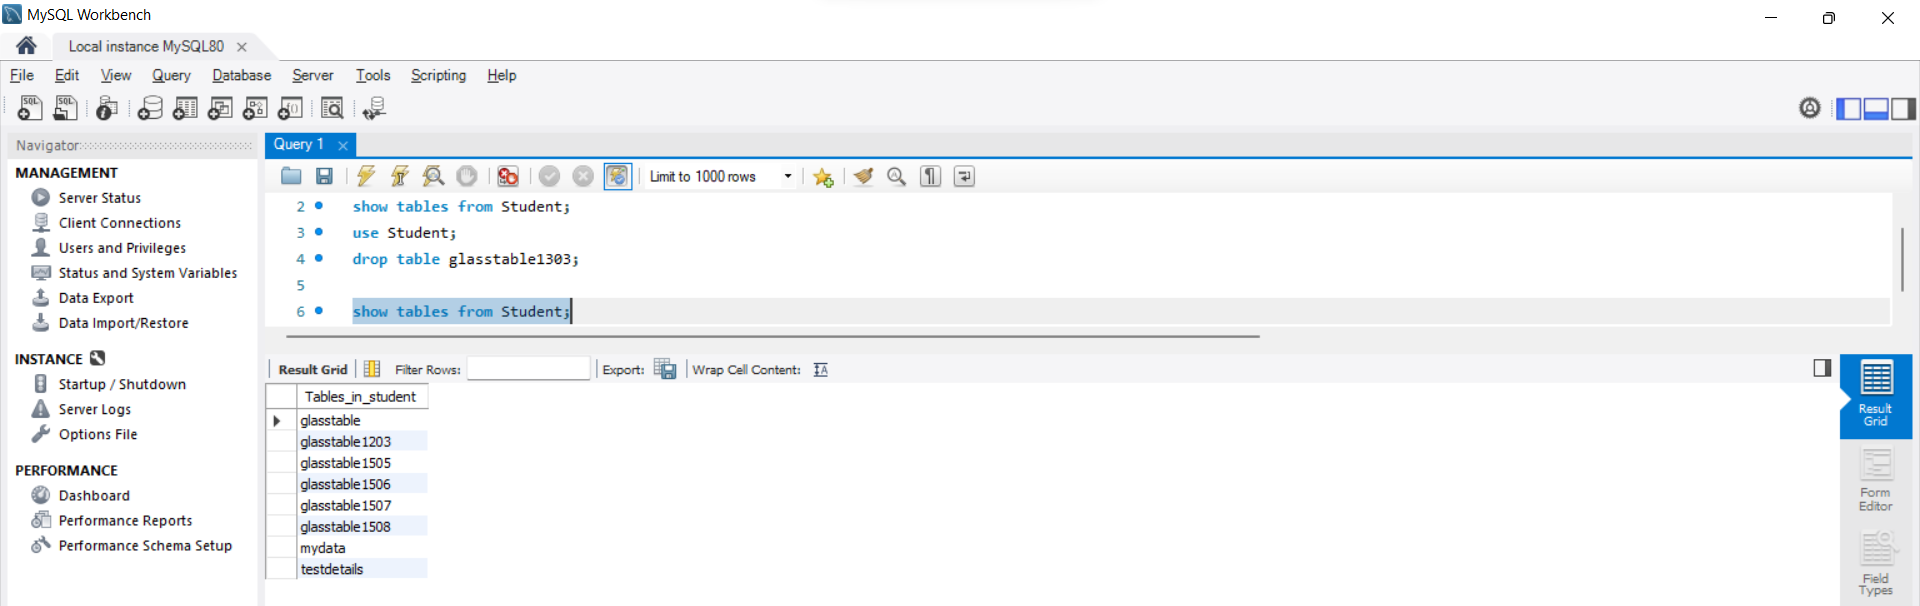

--------------------------------------------------

### groupByOrderBy:

In [15]:
import mysql.connector as connection
import pandas as pandas

try:

    mydb = connection.connect(host="localhost", database='Student', user="root", passwd="MySQL@123", use_pure=True)
    # check if the connection is established
    print(mydb.is_connected())
    query = "select si, Count(Si),Class_col from Student.glasstable1508 group by Class_col order by Si;" #group by class
    result_dataFrame = pandas.read_sql(query,mydb)
    print(result_dataFrame)

    mydb.close()  # close the connection

except Exception as e:
    #mydb.close()
    print(str(e))

True
      si  Count(Si)  Class_col
0  69.89         13        5.0
1  71.78         70        1.0
2  71.87         76        2.0
3  72.37          9        6.0
4  72.77         17        3.0
5  72.81         29        7.0


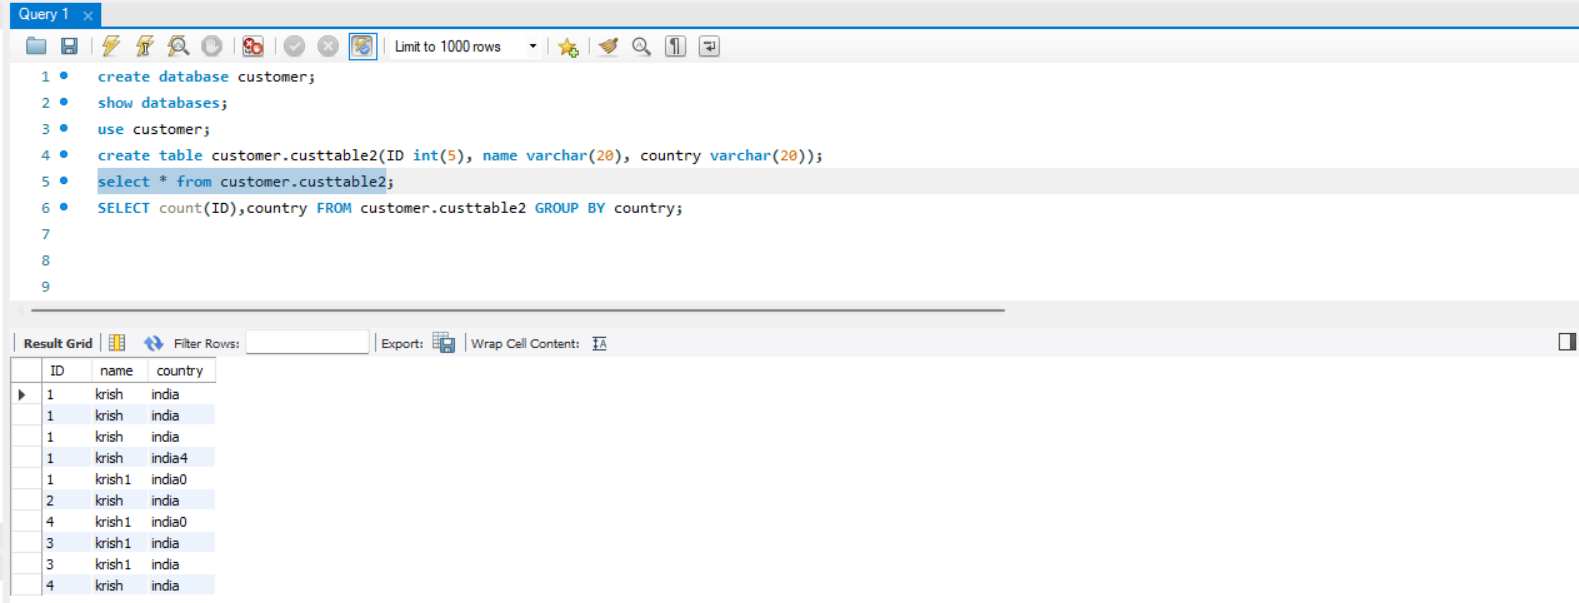
`group by:`
>The following SQL statement lists the number of customers in each country:
`Here we are using group by country which means we get the count of country`

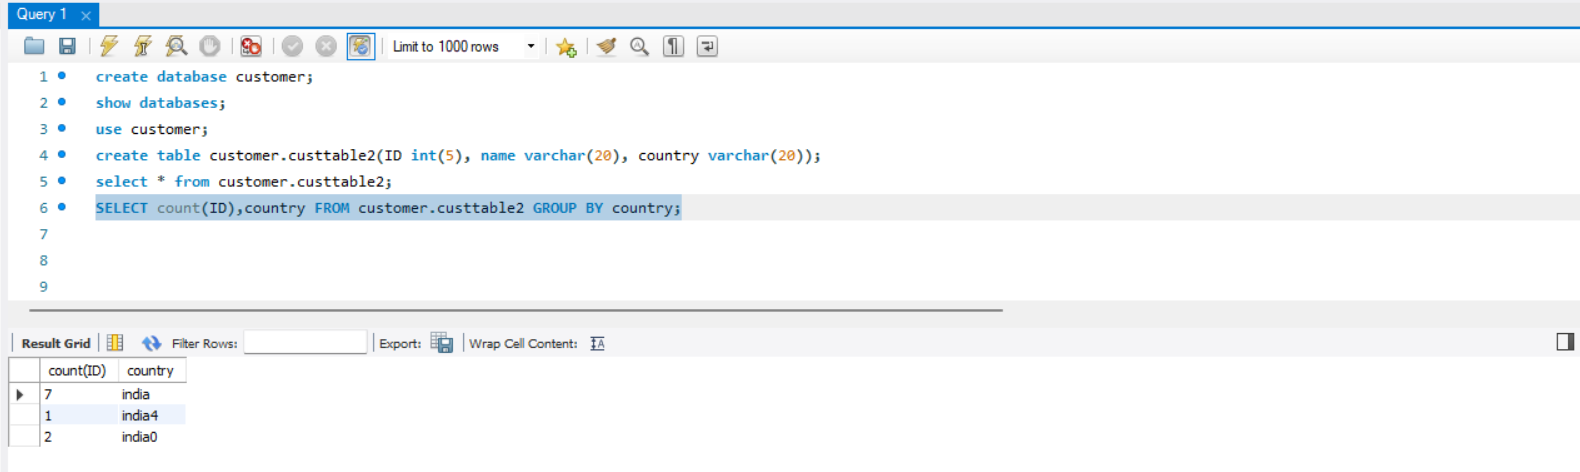


`order by:`
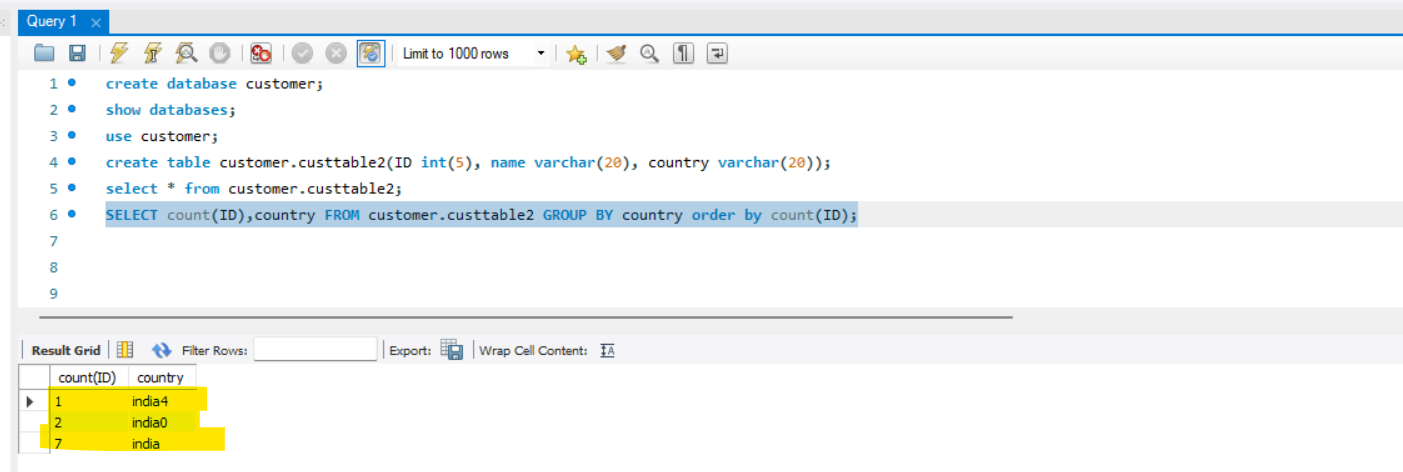
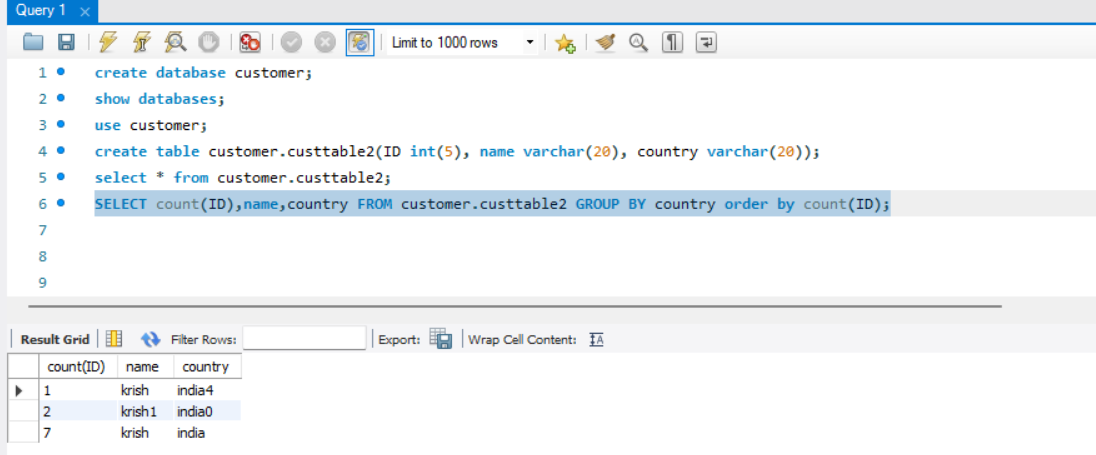

### Carbon NanoTubes Task:

#### Problem Statement: Read the carbon_nanotubes.csv file, process it and insert the data into SQL table.

**Task:**
1. Need to properly split the header row, data 
2. Map the data to the columns and 
3. Insert in to the SQL table

Carbon Nanotubes raw Dataset: https://archive.ics.uci.edu/ml/datasets/Carbon+Nanotubes

https://archive.ics.uci.edu/ml/machine-learning-databases/00448/

Carbon_nanotubes.csv: https://archive.ics.uci.edu/ml/machine-learning-databases/00448/carbon_nanotubes.csv

**Input: Carbon_nanotubes.csv:**
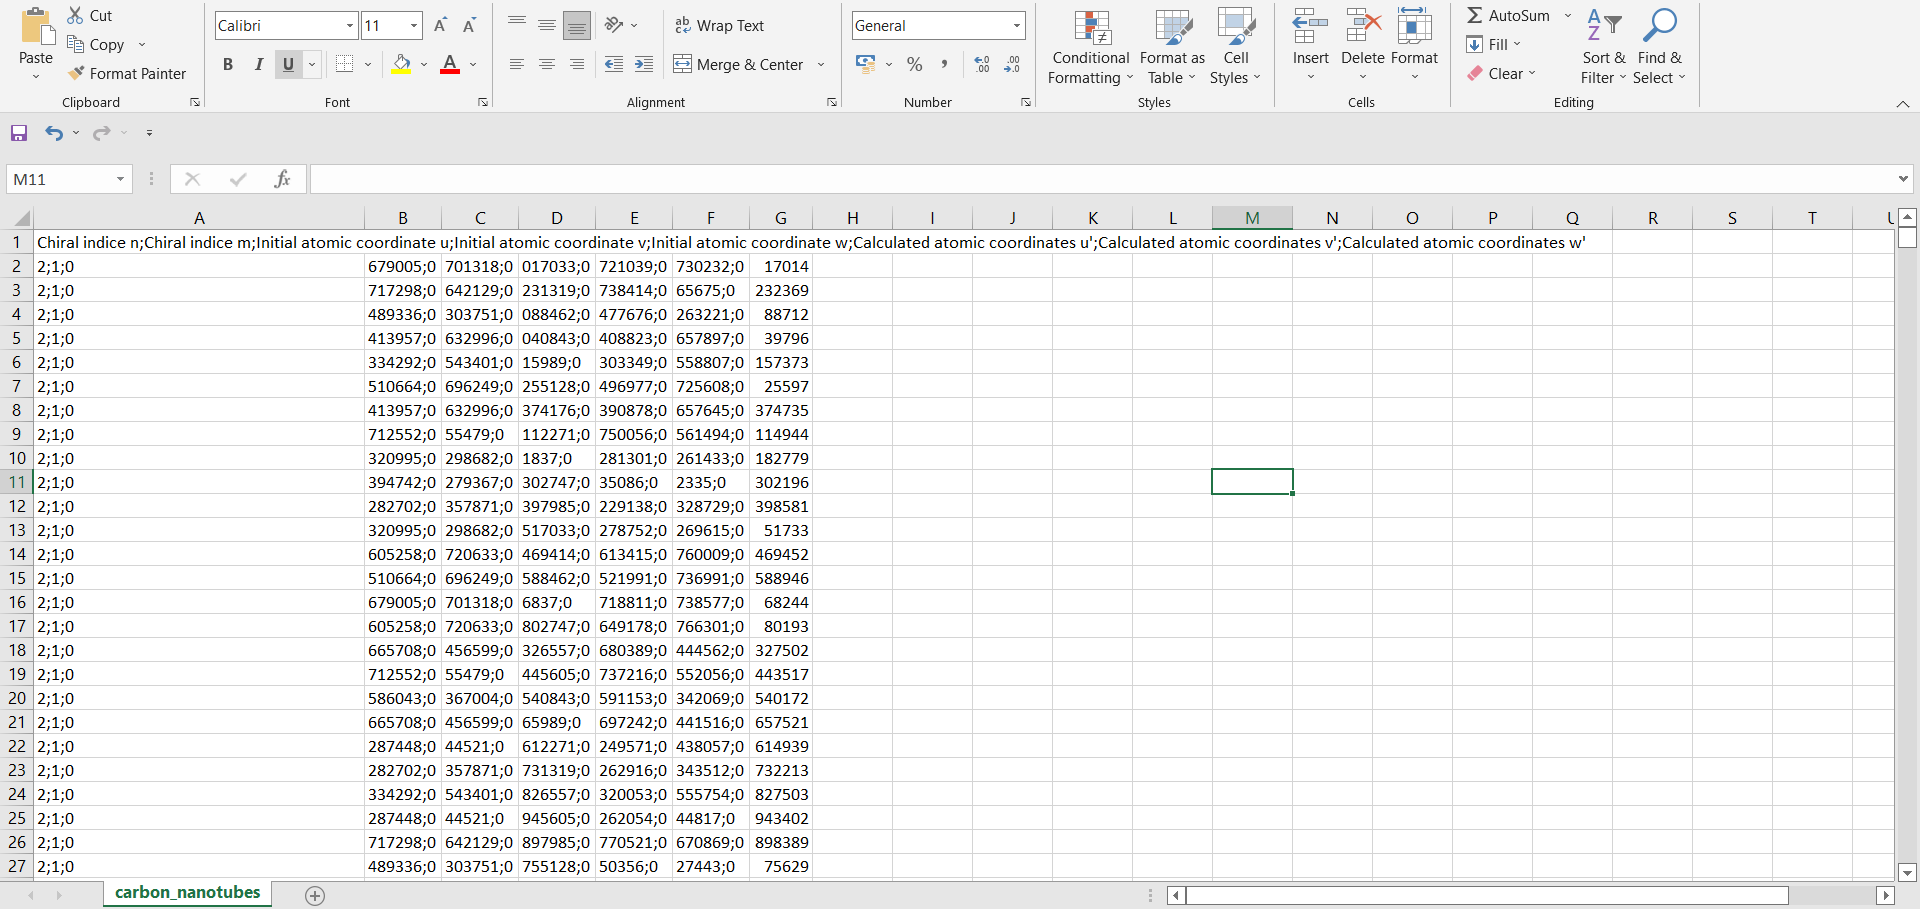

**Approach:**
1. Reading and Processing the Carbon Nanotubes raw Dataset (Carbon_nanotubes.csv)
2. Writing the processed data in to new csv file
3. Creating a database in MySQL
4. Creating a table in the database
5. Inserting data into table

#### Reading and Processing the Carbon Nanotubes raw Dataset:

In [4]:
""" 
adjusting the data in to columns, total 8 attributes
splitting the data with delimiter ';'    
"""

import csv
file_list=[]
with open ('carbon_nanotubes.csv','r') as file:
    data=csv.reader(file,delimiter='\n')
    
    for i in data:
        file_list.append(i[0].split(';')) #splitting the values of the rows where there is ';'

In [5]:
file_list

[['Chiral indice n',
  'Chiral indice m',
  'Initial atomic coordinate u',
  'Initial atomic coordinate v',
  'Initial atomic coordinate w',
  "Calculated atomic coordinates u'",
  "Calculated atomic coordinates v'",
  "Calculated atomic coordinates w'"],
 ['2',
  '1',
  '0,679005',
  '0,701318',
  '0,017033',
  '0,721039',
  '0,730232',
  '0,017014'],
 ['2',
  '1',
  '0,717298',
  '0,642129',
  '0,231319',
  '0,738414',
  '0,65675',
  '0,232369'],
 ['2',
  '1',
  '0,489336',
  '0,303751',
  '0,088462',
  '0,477676',
  '0,263221',
  '0,088712'],
 ['2',
  '1',
  '0,413957',
  '0,632996',
  '0,040843',
  '0,408823',
  '0,657897',
  '0,039796'],
 ['2',
  '1',
  '0,334292',
  '0,543401',
  '0,15989',
  '0,303349',
  '0,558807',
  '0,157373'],
 ['2',
  '1',
  '0,510664',
  '0,696249',
  '0,255128',
  '0,496977',
  '0,725608',
  '0,25597'],
 ['2',
  '1',
  '0,413957',
  '0,632996',
  '0,374176',
  '0,390878',
  '0,657645',
  '0,374735'],
 ['2',
  '1',
  '0,712552',
  '0,55479',
  '0,112271',

#### Writing the processed data in to csv file:

https://www.geeksforgeeks.org/writing-csv-files-in-python/`m

In [6]:
# writing the updated/processed data in to csv file
with open('Carbon_nanotubes_processed2.csv', 'w', newline='') as data:
    writer = csv.writer(data) # creating a csv writer object 
    writer.writerows(file_list) # writing the rows 

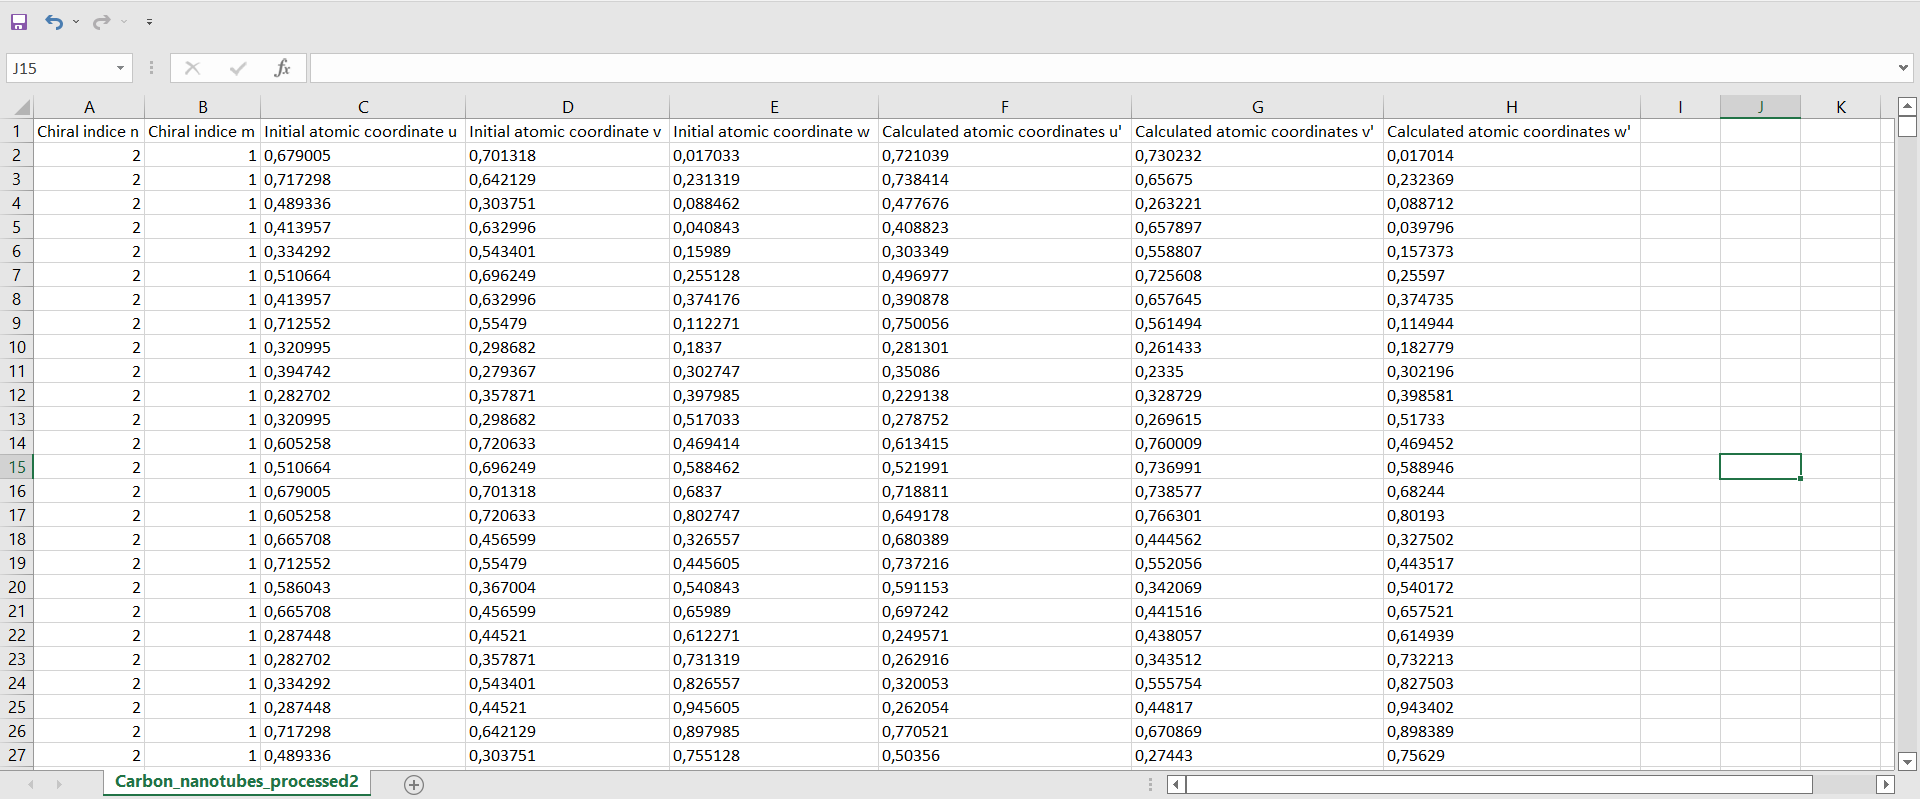

In [10]:
import mysql.connector as connection
import csv
try:
    mydb = connection.connect(host="localhost",user="root", passwd="MySQL@123",use_pure=True)
    # check if the connection is established

    query = "Create database Carbon_NanoTubes4;"

    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    print("Database Created!!")  
    
    
    query2 = "CREATE TABLE Carbon_NanoTubes4.CarbonNanotubes_table4 (Chiralindicen INT,Chiralindicem INT,Initialatomiccoordinateu varchar(20), Initialatomiccoordinatev varchar(20),Initialatomiccoordinatew varchar(20), Calculatedatomiccoordinatesu varchar(20), Calculatedatomiccoordinatesv varchar(20), Calculatedatomiccoordinatesw varchar(20))"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query2)
    print("Table Created!!")

    with open('Carbon_nanotubes_processed2.csv','r') as data:
        next(data)  #we need to write values from the 2nd row of the file bcz 1st row is having col names
        data_csv=csv.reader(data, delimiter = '\n')
        print(data_csv)

        for j in data_csv:
            cursor.execute(f'insert into Carbon_NanoTubes4.CarbonNanotubes_table4 values ({j[0]})') #we need to treat j[0] as variable
    
        print('Values Inserted!')
    mydb.commit()
      
except Exception as e:
    mydb.close()
    print(str(e))

Database Created!!
Table Created!!
Values Inserted!


**Database Created:**
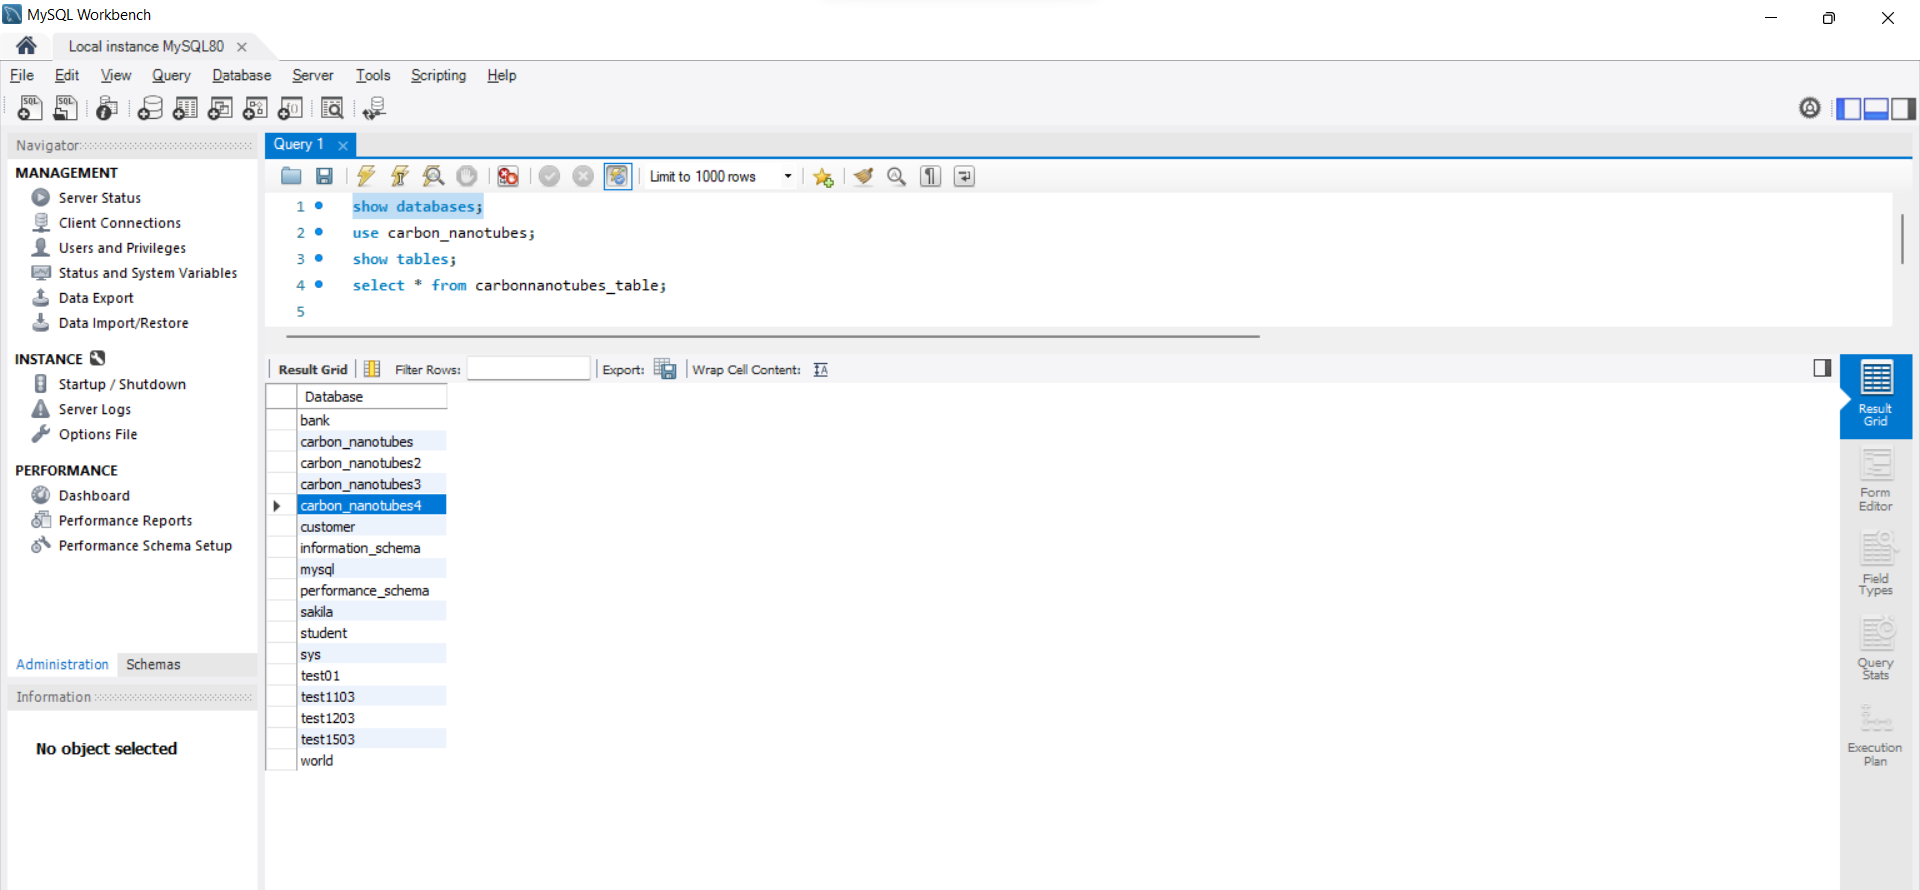
**Table Created:**
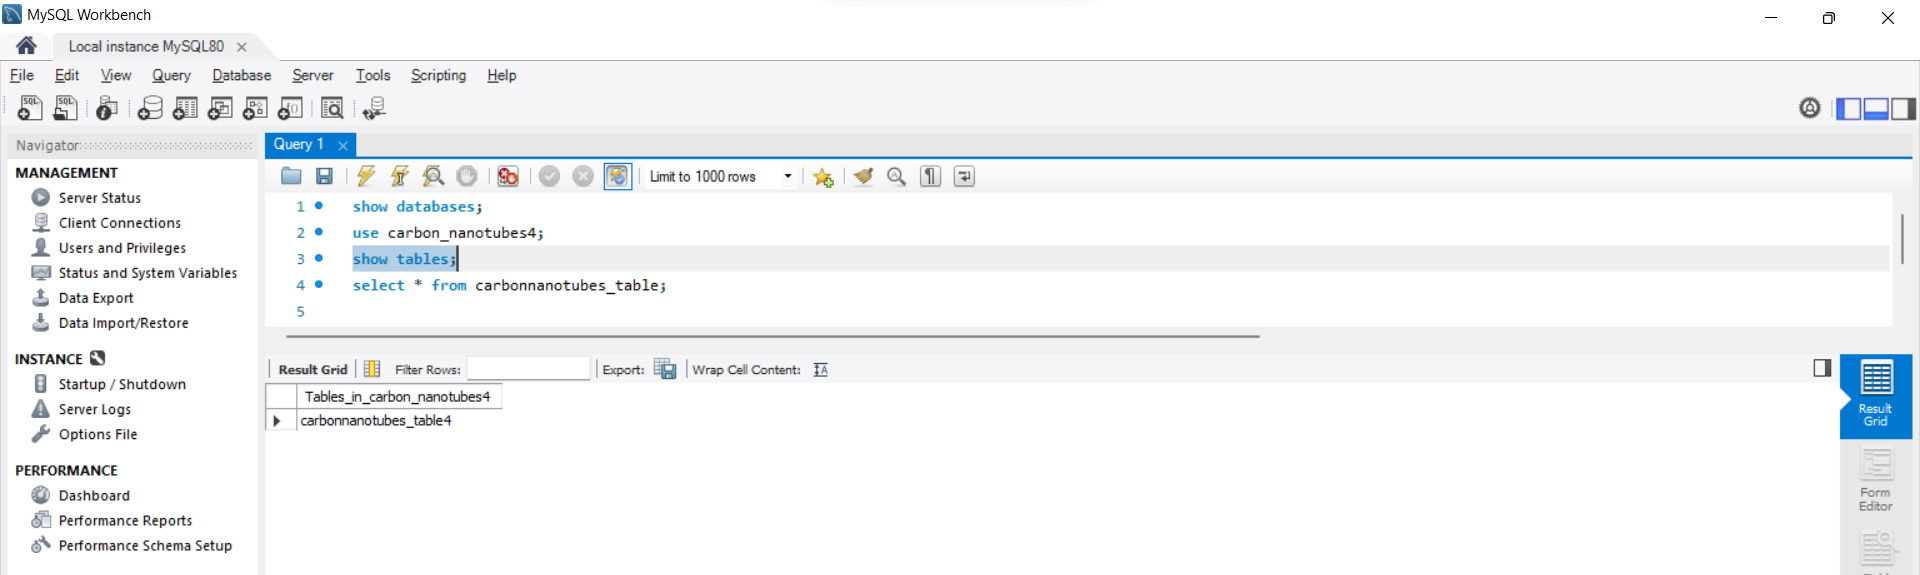
**Values Inserted:**
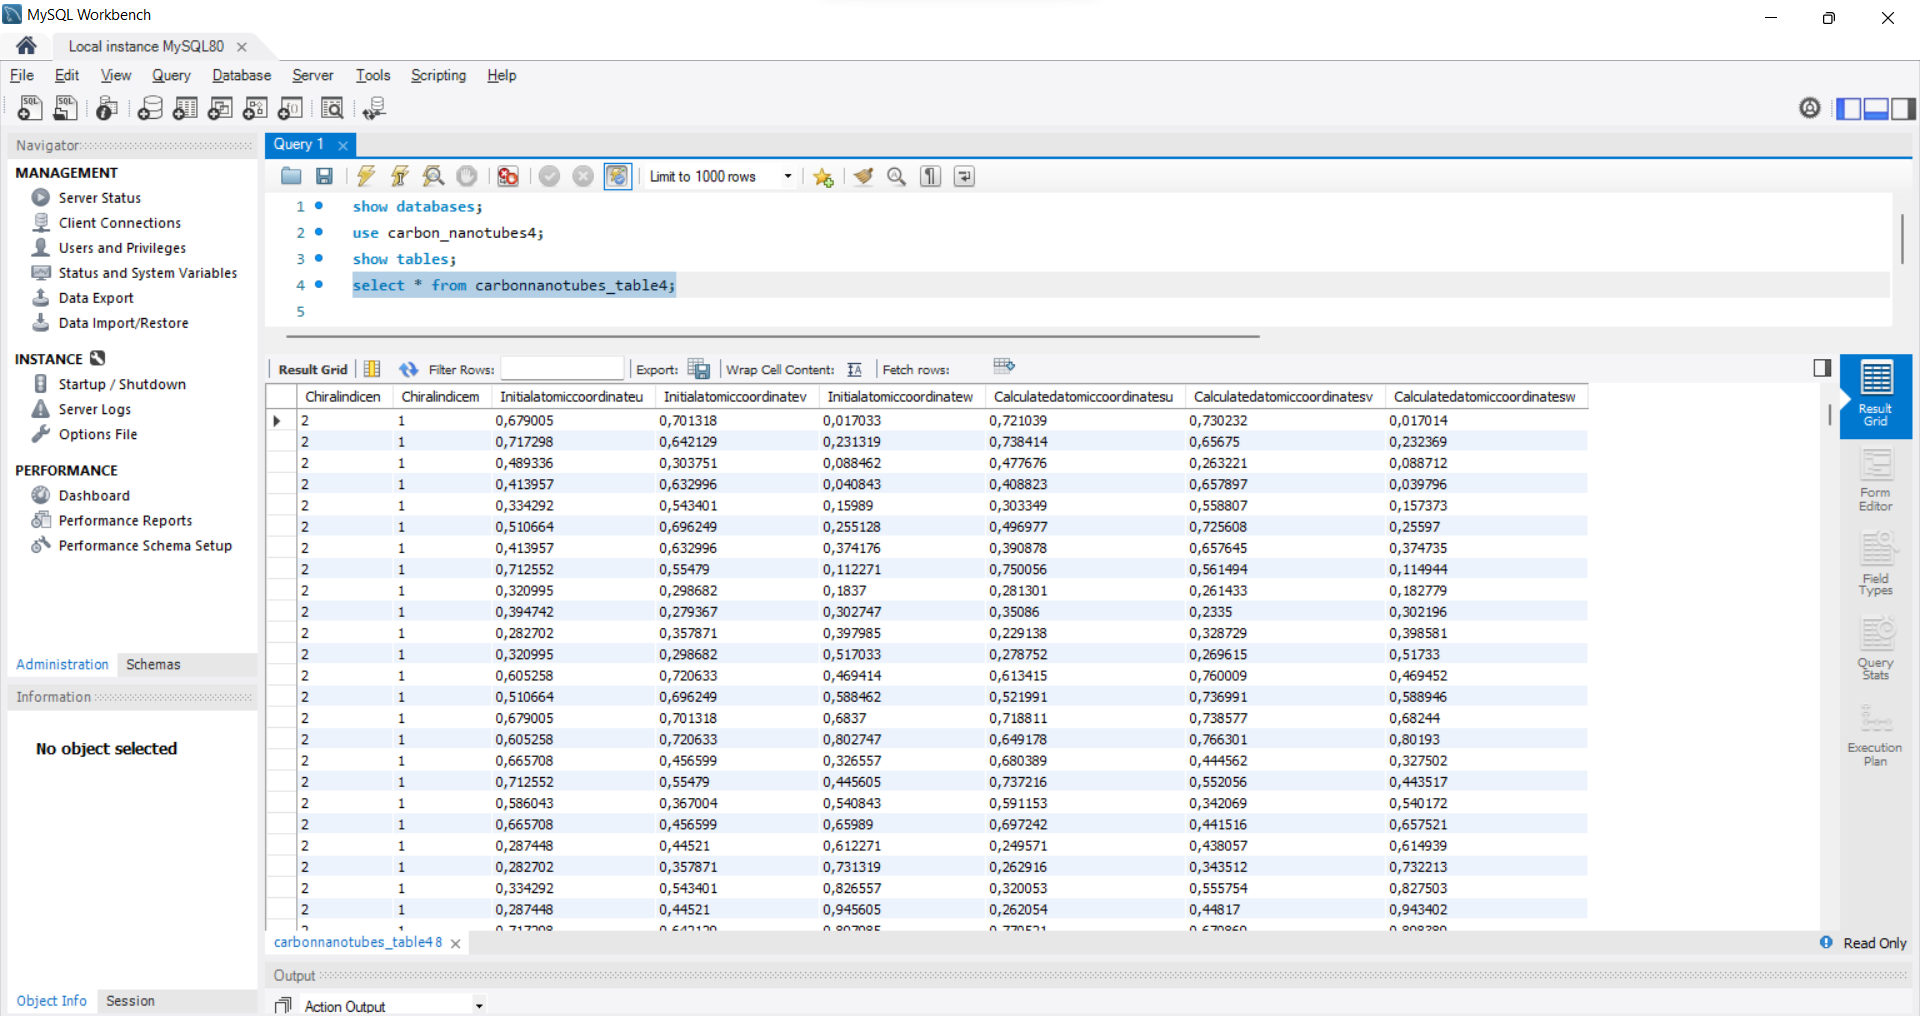

-----------------------------------------------

In [2]:
import mysql.connector as connection
import csv
mydb = connection.connect(host="localhost",user="root", passwd="MySQL@123",use_pure=True)

In [ ]:
import mysql.connector as connection
import csv
try:
    mydb = connection.connect(host="localhost",user="root", passwd="MySQL@123",use_pure=True)
    # check if the connection is established

    query = "Create database Cntubes07;"

    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    print("Database Created!!")  
    
    
    query2 = "CREATE TABLE Cntubes07.cntable (Chiralindicen INT,Chiralindicem INT,Initialatomiccoordinateu varchar(20), Initialatomiccoordinatev varchar(20),Initialatomiccoordinatew varchar(20), Calculatedatomiccoordinatesu varchar(20), Calculatedatomiccoordinatesv varchar(20), Calculatedatomiccoordinatesw varchar(20))"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query2)
    print("Table Created!!") 

#### M-1: delimiter = '\n' and ({j[0]})

In [ ]:
with open('cnt.csv','r') as data:
    next(data)  #we need to write values from the 2nd row of the file bcz 1st row is having col names
    data_csv=csv.reader(data, delimiter = '\n')
    print(data_csv)

    for j in data_csv:
        print(f'insert into Carbon_NanoTubes4.CarbonNanotubes_table4 values ({j[0]})')
        cursor.execute(f'insert into Carbon_NanoTubes4.CarbonNanotubes_table4 values ({j[0]})') #we need to treat j[0] as variable

    print('Values Inserted!')
mydb.commit()

#### M-2: delimiter = '\n' and (',').join([i for i in j])

In [3]:
cursor = mydb.cursor() #create a cursor to execute queries

with open('cnt.csv','r') as data:
    next(data)  #we need to write values from the 2nd row of the file bcz 1st row is having col names
    data_csv=csv.reader(data, delimiter = '\n')
    print(data_csv)

    for j in data_csv:
        print(j)
        print ((',').join([i for i in j])) #here this statement this equals to j[0]
        print(j[0])

FileNotFoundError: [Errno 2] No such file or directory: 'cnt.csv'

In [ ]:
cursor = mydb.cursor() #create a cursor to execute queries

with open('cnt.csv','r') as data:
    next(data)  #we need to write values from the 2nd row of the file bcz 1st row is having col names
    data_csv=csv.reader(data, delimiter = '\n')
    print(data_csv)

    for j in data_csv:
        print(f"insert into Carbon_NanoTubes4.CarbonNanotubes_table4 values ({(',').join([i for i in j])}))")
        cursor.execute(f"insert into Carbon_NanoTubes4.CarbonNanotubes_table4 values ({(',').join([i for i in j])})") #we need to treat j[0] as variable

    print('Values Inserted!')
mydb.commit()

#### M-3: delimiter = ','

In [ ]:
with open('cnt.csv','r') as data:
    next(data)  #we need to write values from the 2nd row of the file bcz 1st row is having col names
    data_csv=csv.reader(data, delimiter = ',')
    print(data_csv)

    for j in data_csv:
        print(j)

In [ ]:
cursor = mydb.cursor() #create a cursor to execute queries

with open('cnt.csv','r') as data:
    next(data)  #we need to write values from the 2nd row of the file bcz 1st row is having col names
    data_csv=csv.reader(data, delimiter = ',')
    print(data_csv)

    for j in data_csv:
        print("insert into Cntubes07.cntable values (%s,%s,%s,%s,%s,%s,%s,%s)",[j[0],j[1],j[2],j[3],j[4],j[5],j[6],j[7]])
        cursor.execute("insert into Cntubes07.cntable values (%s,%s,%s,%s,%s,%s,%s,%s)",[j[0],j[1],j[2],j[3],j[4],j[5],j[6],j[7]])

    print('Values Inserted!')
mydb.commit()

# %s is the placeholder

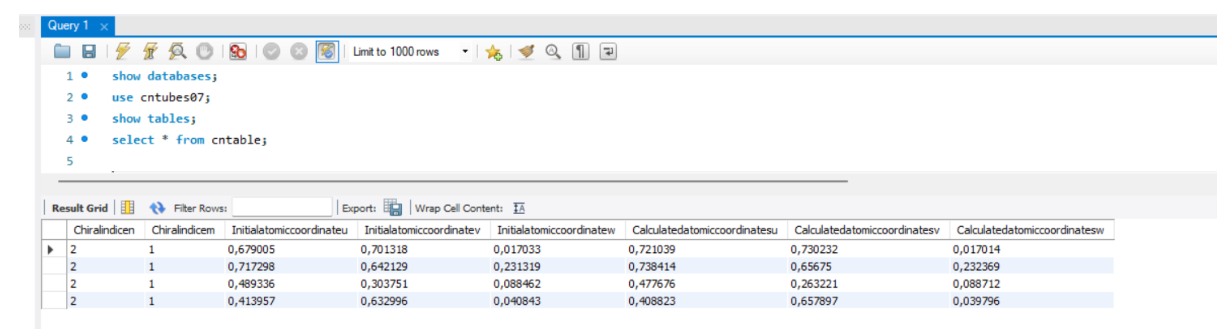

### use of delimiter in csv file?

Basically delimiter is the value/character that tells the interpreter to seperate the values of a row in a file.

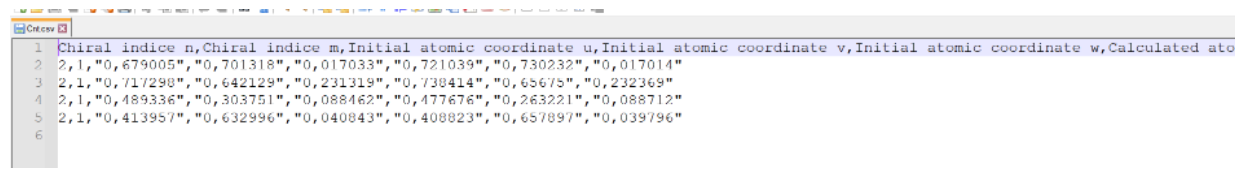
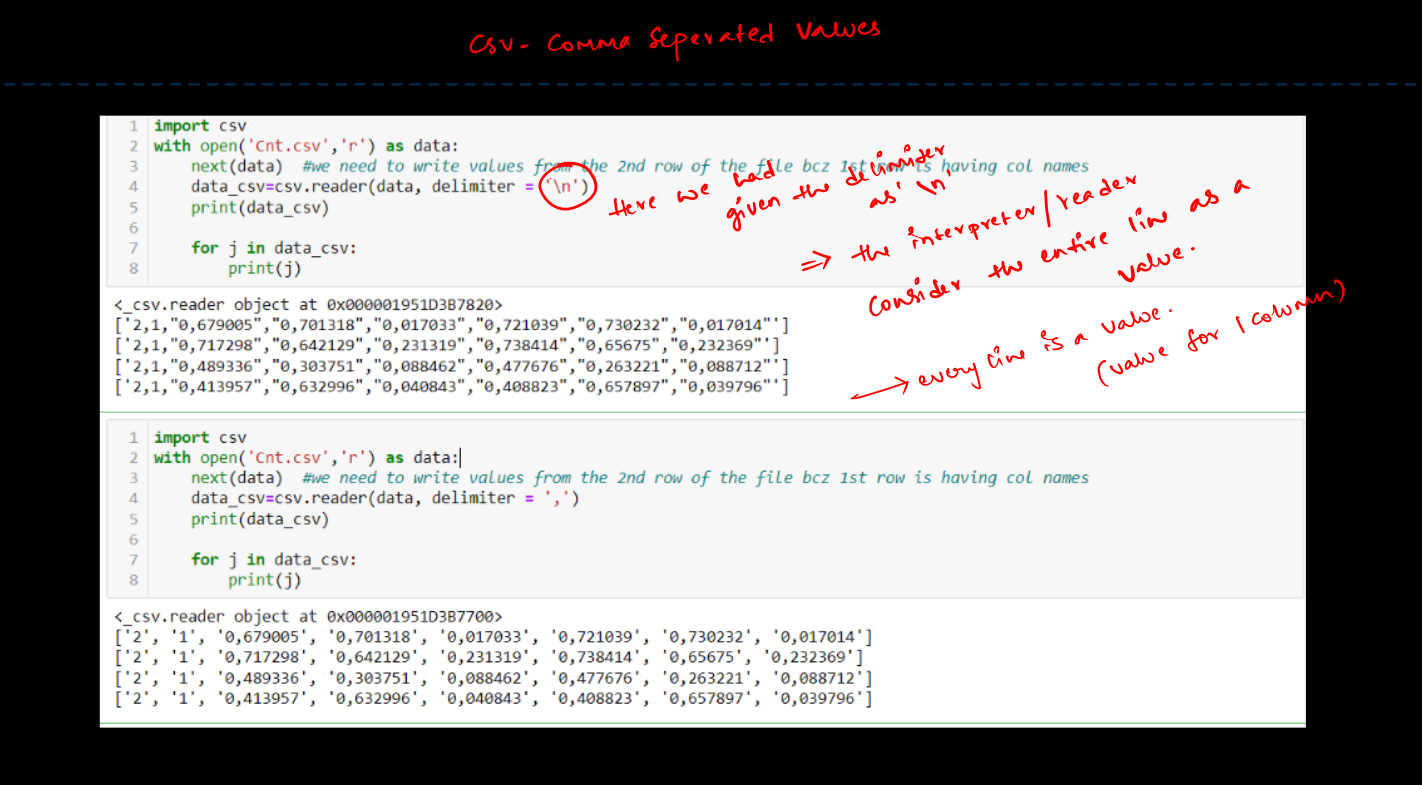
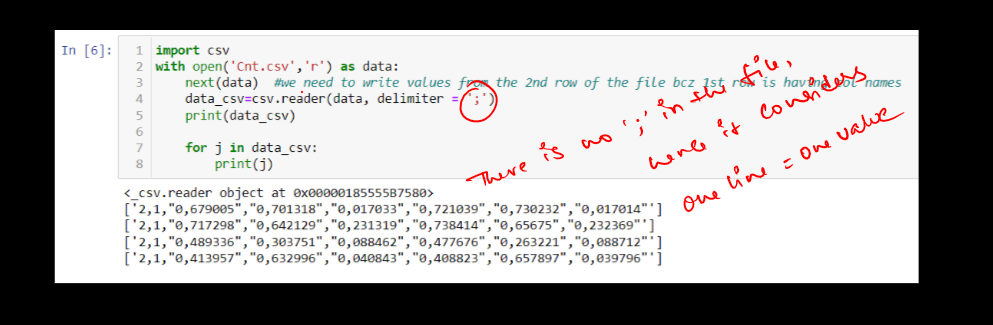

`SQL Basic Queries:`
1. To check whether the DB is connected or not: `mydb.is_connected()`
2. list of databases: `SHOW databases`
3. create a database: `CREATE DATABASE database_name`
4. create a table in database:`CREATE TABLE table_name(col_name datatype_of_col_values(length_of_values_accepted),col_name datatype_of_col_values(length_of_values_accepted))`
5. Insert data into table: `INSERT INTO table_name VALUES (  )`
6. Fetching data from table: `SELECT * FROM table_name`
7. creating dataframe from table's data: `pd.read_sql('select * from Student.testdetails',mydb)`
	--->mydb = connection.connect(host="localhost", database='Student', user="root", passwd="MySQL@123", use_pure=True)
8. Writing data to csv: b=pd.read_sql('select * from Student.testdetails',mydb)
						`b.to_csv("mydata.csv")`
9. Not IMP: Writing data to sql table:   --- Need to use sqlalchemy
	data=pd.read_csv('mydata.csv')
	data.to_sql(table_name,connection)
10. Delete from table: `DELETE FROM table_name WHERE col_name='value'`
11. Update table: `UPDATE tablename SET x1=1403, x2='krish' WHERE x1=456`
12. List of all tables in a Database: `SHOW TABLES FROM database_name`
13. Delete a Database: `DROP DATABASE database_name`
14. Delete a table from Database: `DROP TABLE table_name`